In [17]:
#importing the dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import gc # garbage collection that automatically frees up memory that is no longer being used

# suppress warnings
import warnings
warnings.filterwarnings('ignore')

#importing the files
train_clinical_data = pd.read_csv("train_clinical_data.csv")
train_peptides = pd.read_csv("train_peptides.csv")
train_protiens = pd.read_csv("train_proteins.csv")
supplemental_clinical_data = pd.read_csv("supplemental_clinical_data.csv")
combined_data = pd.concat([train_clinical_data, supplemental_clinical_data]).reset_index(drop=True)
combined_data

,visit_id,patient_id,visit_month,updrs_1,updrs_2,updrs_3,updrs_4,upd23b_clinical_state_on_medication
0,55_0,55,0,10.0,6.0,15.0,NaN,NaN
1,55_3,55,3,10.0,7.0,25.0,NaN,NaN
2,55_6,55,6,8.0,10.0,34.0,NaN,NaN
3,55_9,55,9,8.0,9.0,30.0,0.0,On
4,55_12,55,12,10.0,10.0,41.0,0.0,On
...,...,...,...,...,...,...,...,...
4833,65382_0,65382,0,NaN,NaN,0.0,NaN,NaN
4834,65405_0,65405,0,5.0,16.0,31.0,0.0,NaN
4835,65405_5,65405,5,NaN,NaN,57.0,NaN,NaN
4836,65530_0,65530,0,10.0,6.0,24.0,0.0,NaN


In [18]:
proteins = []
protein_dict = {}
for index, row in train_protiens.iterrows():
    protein = row["UniProt"]
    if protein not in protein_dict:
        protein_dict[protein] = {}
        proteins.append(protein)
    protein_dict[protein][row["visit_id"]] = row["NPX"]

peptides = []
peptide_dict = {}
for index, row in train_peptides.iterrows():
    peptide = row["Peptide"]
    if peptide not in peptide_dict:
        peptide_dict[peptide] = {}
        peptides.append(peptide)
    peptide_dict[peptide][row["visit_id"]] = row["PeptideAbundance"]

train_copy = combined_data.copy()
for protein in proteins:
    train_copy[protein] = train_copy["visit_id"].apply(lambda visit_id: 0 if visit_id not in protein_dict[protein] else protein_dict[protein][visit_id])

for peptide in peptides:
    train_copy[peptide] = train_copy["visit_id"].apply(lambda visit_id: 0 if visit_id not in peptide_dict[peptide] else peptide_dict[peptide][visit_id])

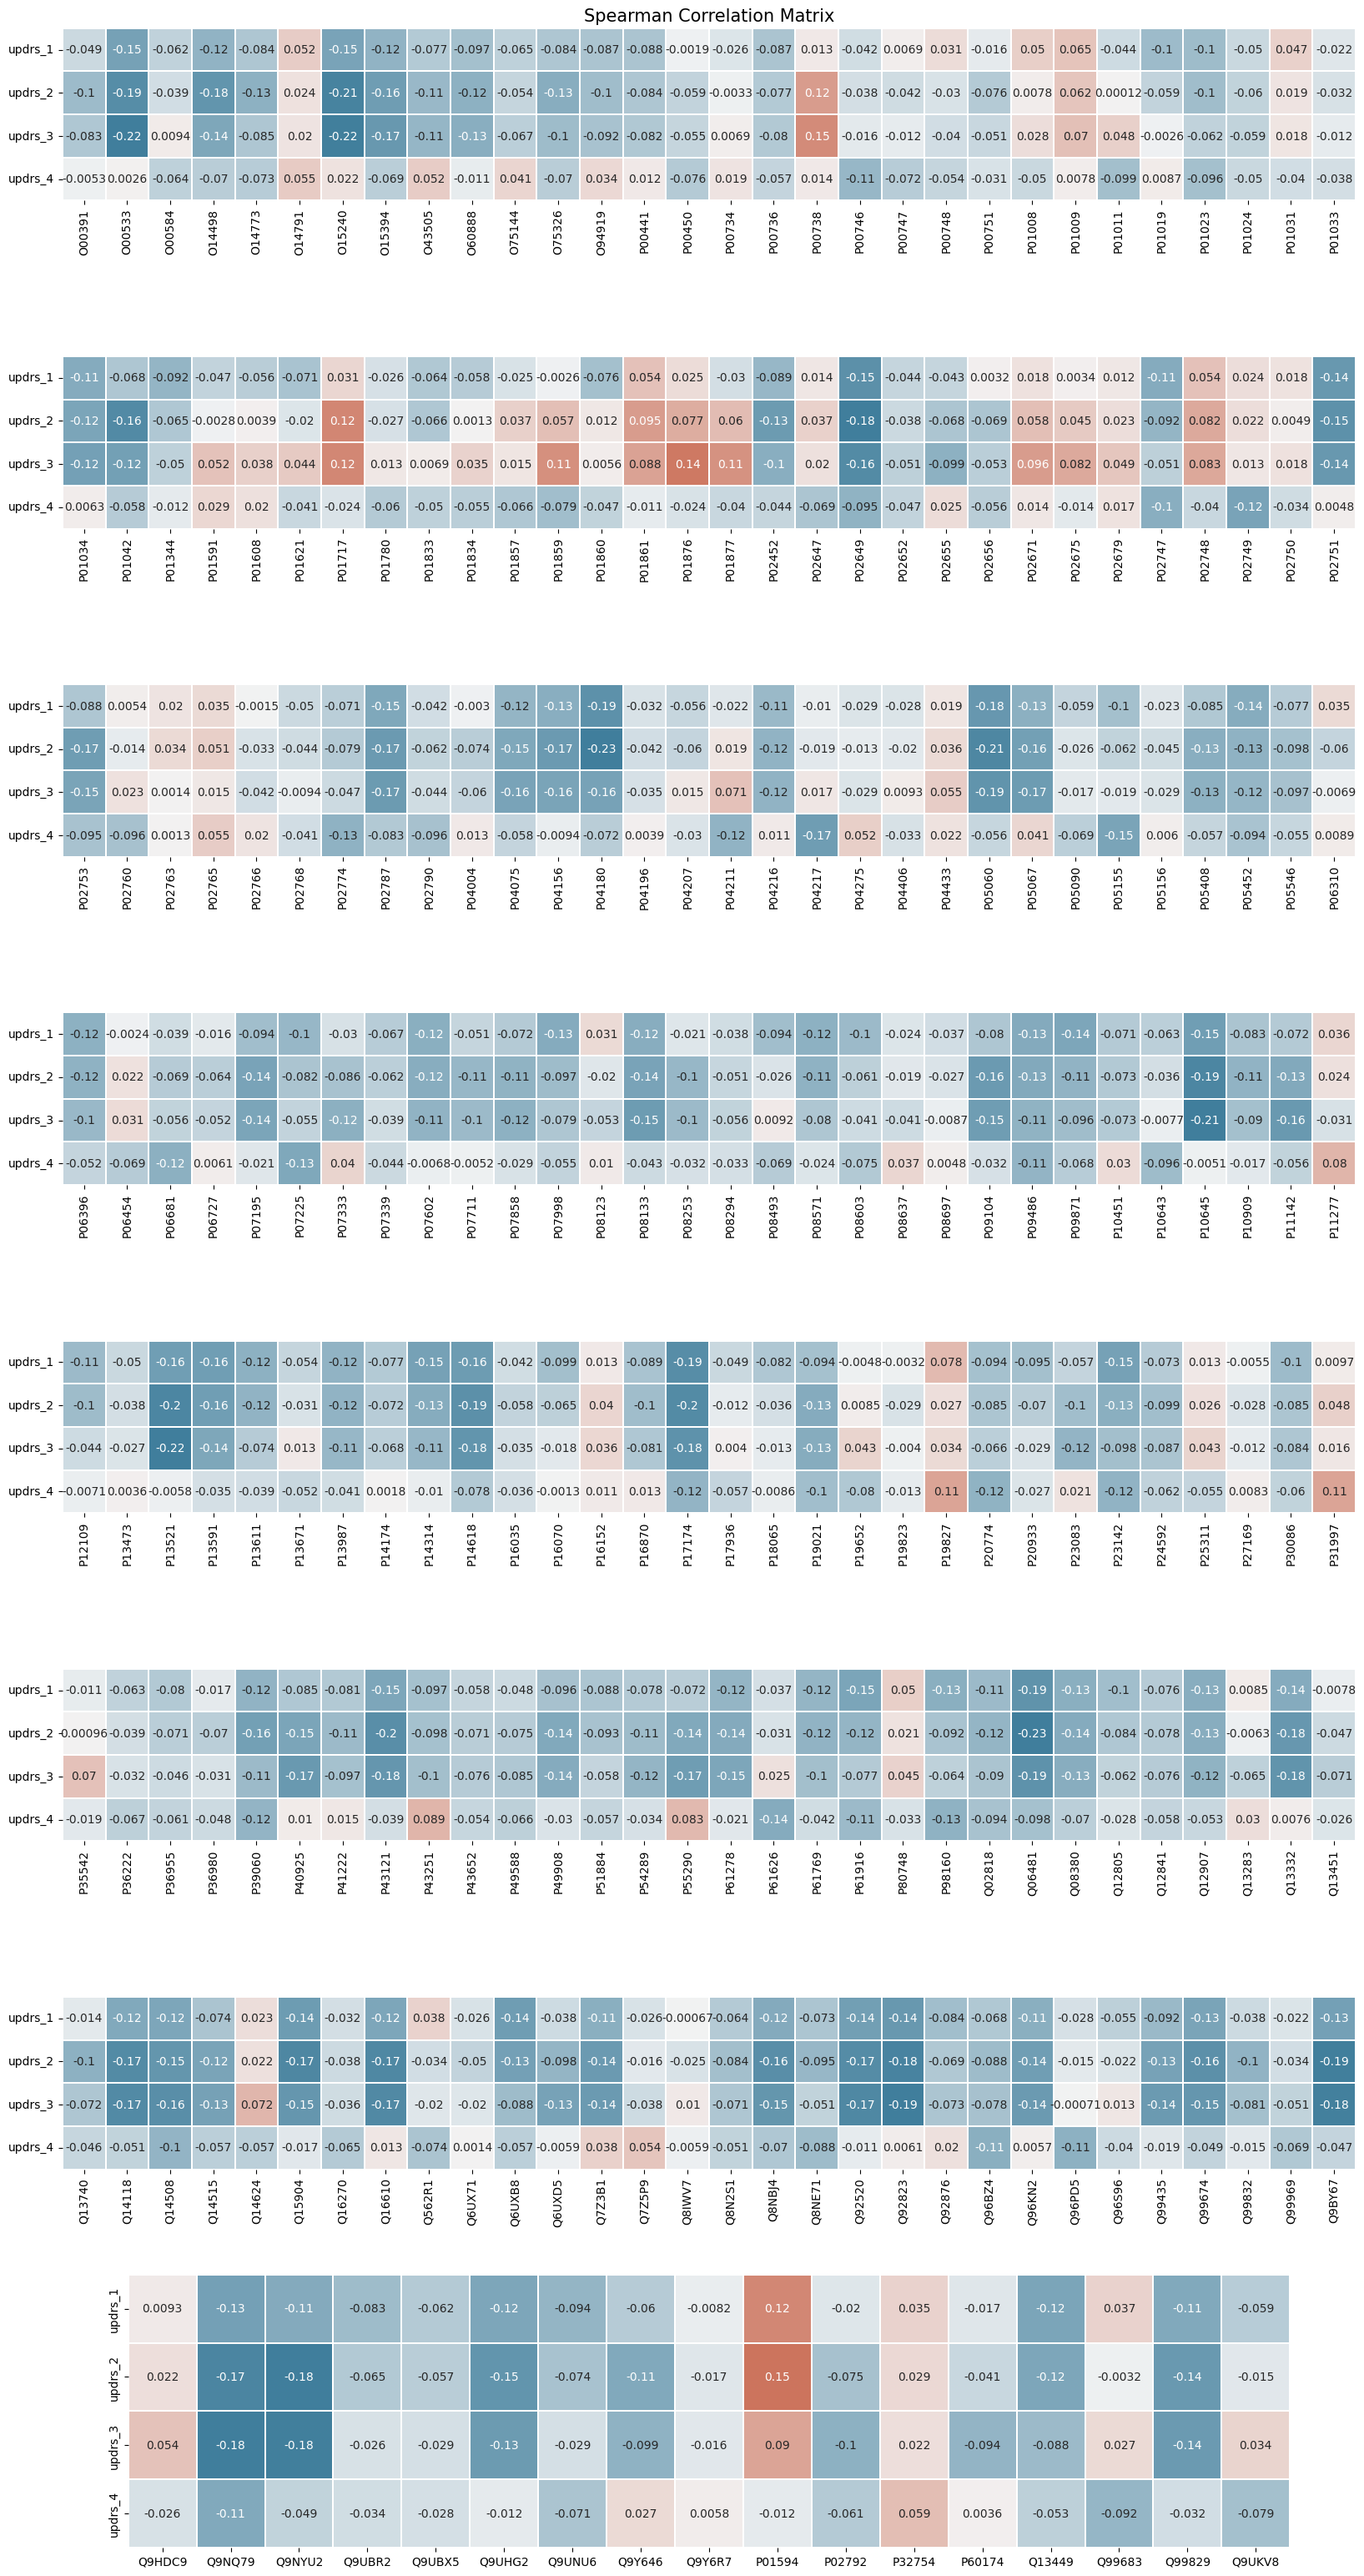

In [19]:
features = []
features.extend(proteins)

# Set missing values to null so our correlation matrix won't include 0 values in the correlation calculation
train_copy[features] = train_copy[features].replace(0.0, np.nan)

features.extend(["updrs_1", "updrs_2", "updrs_3", "updrs_4"])

correlation_matrix = train_copy[features].corr(method="spearman")

from matplotlib.colors import SymLogNorm

fig, axs = plt.subplots(nrows=8, ncols=1, figsize=(20, 40))

axs = axs.flatten()

_ = sns.heatmap(
    correlation_matrix.iloc[-4:,0:30],
    cmap=sns.diverging_palette(230, 20, as_cmap=True),
    center=0, square=True, linewidths=.1, cbar=False, ax=axs[0], annot=True,
)
_ = axs[0].set_title("Spearman Correlation Matrix", fontsize=15)

_ = sns.heatmap(
    correlation_matrix.iloc[-4:,30:60],
    cmap=sns.diverging_palette(230, 20, as_cmap=True),
    center=0, square=True, linewidths=.1, cbar=False, ax=axs[1], annot=True,
)

_ = sns.heatmap(
    correlation_matrix.iloc[-4:,60:90],
    cmap=sns.diverging_palette(230, 20, as_cmap=True),
    center=0, square=True, linewidths=.1, cbar=False, ax=axs[2], annot=True,
)

_ = sns.heatmap(
    correlation_matrix.iloc[-4:,90:120],
    cmap=sns.diverging_palette(230, 20, as_cmap=True),
    center=0, square=True, linewidths=.1, cbar=False, ax=axs[3], annot=True,
)

_ = sns.heatmap(
    correlation_matrix.iloc[-4:,120:150],
    cmap=sns.diverging_palette(230, 20, as_cmap=True),
    center=0, square=True, linewidths=.1, cbar=False, ax=axs[4], annot=True,
)

_ = sns.heatmap(
    correlation_matrix.iloc[-4:,150:180],
    cmap=sns.diverging_palette(230, 20, as_cmap=True),
    center=0, square=True, linewidths=.1, cbar=False, ax=axs[5], annot=True,
)

_ = sns.heatmap(
    correlation_matrix.iloc[-4:,180:210],
    cmap=sns.diverging_palette(230, 20, as_cmap=True),
    center=0, square=True, linewidths=.1, cbar=False, ax=axs[6], annot=True,
)

_ = sns.heatmap(
    correlation_matrix.iloc[-4:,210:227],
    cmap=sns.diverging_palette(230, 20, as_cmap=True),
    center=0, square=True, linewidths=.1, cbar=False, ax=axs[7], annot=True,
)

In [20]:
train_copy.head()

,visit_id,patient_id,visit_month,updrs_1,updrs_2,updrs_3,updrs_4,upd23b_clinical_state_on_medication,O00391,O00533,...,QALPQVR,SGNIPAGTTVDTK,RLGMFNIQHC(UniMod_4)K,EPQVYTLPPSRDELTK,PALEDLR,QKVEPLRAELQEGAR,RTHLPEVFLSK,INHC(UniMod_4)RFDEFFSEGC(UniMod_4)APGSKK,EQPPSLTR,AGC(UniMod_4)VAESTAVC(UniMod_4)R
0,55_0,55,0,10.0,6.0,15.0,NaN,NaN,11254.3,732430.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,55_3,55,3,10.0,7.0,25.0,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,55_6,55,6,8.0,10.0,34.0,NaN,NaN,13163.6,630465.0,...,0.0,0.0,0.0,0.0,50231.1,2588340.0,0.0,455333.0,0.0,0.0
3,55_9,55,9,8.0,9.0,30.0,0.0,On,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,55_12,55,12,10.0,10.0,41.0,0.0,On,15257.6,815083.0,...,25589.4,65762.6,0.0,0.0,24770.9,0.0,0.0,0.0,0.0,0.0


SVr

In [21]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Step 1: Prepare the Data
data = train_copy[features + ["upd23b_clinical_state_on_medication", "visit_month"]]
targets = train_copy[["updrs_1", "updrs_2", "updrs_3", "updrs_4"]]

# Step 2: Convert non-numeric column to numeric representation
le = LabelEncoder()
data["upd23b_clinical_state_on_medication"] = le.fit_transform(data["upd23b_clinical_state_on_medication"])

# Step 3: Split the Data
X_train, X_test, y_train, y_test = train_test_split(data, targets, test_size=0.2, random_state=42)

# Step 4: Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 5: Impute Missing Values
numeric_features = features + ["visit_month"]
non_numeric_features = ["upd23b_clinical_state_on_medication"]
numeric_imputer = SimpleImputer(strategy='median')
non_numeric_imputer = SimpleImputer(strategy='most_frequent')

X_train_imputed = X_train.copy()
X_test_imputed = X_test.copy()

X_train_imputed[numeric_features] = numeric_imputer.fit_transform(X_train[numeric_features])
X_train_imputed[non_numeric_features] = non_numeric_imputer.fit_transform(X_train[non_numeric_features])

X_test_imputed[numeric_features] = numeric_imputer.transform(X_test[numeric_features])
X_test_imputed[non_numeric_features] = non_numeric_imputer.transform(X_test[non_numeric_features])

# Handle missing values in the target variable
y_train_imputed = y_train.copy()
y_train_imputed = y_train_imputed.replace(np.nan, 0)

# Step 6: SVR Model Training
svr_updrs_1 = SVR()
svr_updrs_1.fit(X_train_imputed, y_train_imputed["updrs_1"])

svr_updrs_2 = SVR()
svr_updrs_2.fit(X_train_imputed, y_train_imputed["updrs_2"])

svr_updrs_3 = SVR()
svr_updrs_3.fit(X_train_imputed, y_train_imputed["updrs_3"])

svr_updrs_4 = SVR()
svr_updrs_4.fit(X_train_imputed, y_train_imputed["updrs_4"])

# Step 7: Model Prediction
y_pred_updrs_1 = svr_updrs_1.predict(X_test_imputed)
y_pred_updrs_2 = svr_updrs_2.predict(X_test_imputed)
y_pred_updrs_3 = svr_updrs_3.predict(X_test_imputed)
y_pred_updrs_4 = svr_updrs_4.predict(X_test_imputed)

# Step 8: Calculate SMAPE
smape_scores = []
targets_pred = [y_pred_updrs_1, y_pred_updrs_2, y_pred_updrs_3, y_pred_updrs_4]

for i, col in enumerate(targets.columns):
    true_values = y_test[col]
    predicted_values = targets_pred[i]
    smape = 2 * np.mean(np.abs(true_values - predicted_values) / (np.abs(true_values) + np.abs(predicted_values)))
    smape_scores.append(smape)

lowest_smape_index = np.argmin(smape_scores)
lowest_smape = smape_scores[lowest_smape_index]
lowest_smape_updrs = targets.columns[lowest_smape_index]


# for printing Smape value

smape_scores = []
targets_pred = [y_pred_updrs_1, y_pred_updrs_2, y_pred_updrs_3, y_pred_updrs_4]

for i, col in enumerate(targets.columns):
    true_values = y_test[col]
    predicted_values = targets_pred[i]
    smape = 2 * np.mean(np.abs(true_values - predicted_values) / (np.abs(true_values) + np.abs(predicted_values)))
    smape_scores.append(smape)
    print(f"SMAPE for {col}: {smape:.4f}")

lowest_smape_index = np.argmin(smape_scores)
lowest_smape = smape_scores[lowest_smape_index]
lowest_smape_updrs = targets.columns[lowest_smape_index]

print(f"Lowest SMAPE: {lowest_smape:.4f} for {lowest_smape_updrs}")



SMAPE for updrs_1: 0.6590
SMAPE for updrs_2: 0.8212
SMAPE for updrs_3: 0.6250
SMAPE for updrs_4: 1.9527
Lowest SMAPE: 0.6250 for updrs_3


SMAPE for updrs_1 (Fold-wise): 0.6888
SMAPE for updrs_2 (Fold-wise): 0.8094
SMAPE for updrs_3 (Fold-wise): 0.6347
SMAPE for updrs_4 (Fold-wise): 1.9588


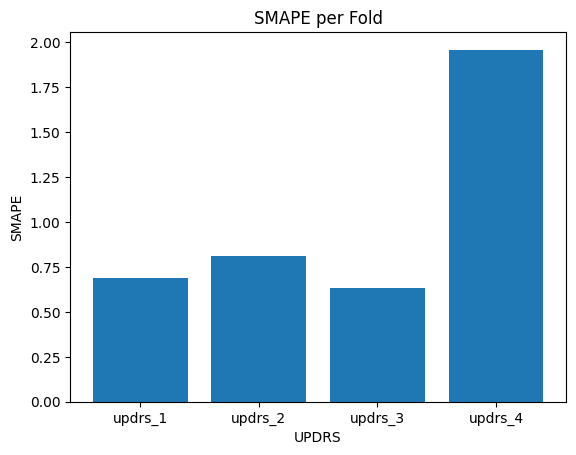

In [22]:
from sklearn.model_selection import cross_val_predict
import matplotlib.pyplot as plt

# Step 6: SVR Model Training with Cross-Validation
svr_updrs_1 = SVR()
y_pred_updrs_1 = cross_val_predict(svr_updrs_1, X_train_imputed, y_train_imputed["updrs_1"], cv=5)

svr_updrs_2 = SVR()
y_pred_updrs_2 = cross_val_predict(svr_updrs_2, X_train_imputed, y_train_imputed["updrs_2"], cv=5)

svr_updrs_3 = SVR()
y_pred_updrs_3 = cross_val_predict(svr_updrs_3, X_train_imputed, y_train_imputed["updrs_3"], cv=5)

svr_updrs_4 = SVR()
y_pred_updrs_4 = cross_val_predict(svr_updrs_4, X_train_imputed, y_train_imputed["updrs_4"], cv=5)

# Step 8: Calculate SMAPE per fold
smape_scores_fold = []
targets_pred_fold = [y_pred_updrs_1, y_pred_updrs_2, y_pred_updrs_3, y_pred_updrs_4]

for i, col in enumerate(targets.columns):
    true_values = y_train[col]
    predicted_values = targets_pred_fold[i]
    smape_fold = 2 * np.mean(np.abs(true_values - predicted_values) / (np.abs(true_values) + np.abs(predicted_values)))
    smape_scores_fold.append(smape_fold)
    print(f"SMAPE for {col} (Fold-wise): {smape_fold:.4f}")

# Step 9: Plot SMAPE per fold
plt.bar(targets.columns, smape_scores_fold)
plt.xlabel("UPDRS")
plt.ylabel("SMAPE")
plt.title("SMAPE per Fold")
plt.show()


SMAPE for updrs_1 (Fold 1): 0.7564
SMAPE for updrs_2 (Fold 1): 0.8744
SMAPE for updrs_3 (Fold 1): 0.6558
SMAPE for updrs_4 (Fold 1): 1.9732
SMAPE for updrs_1 (Fold 2): 0.7391
SMAPE for updrs_2 (Fold 2): 0.8874
SMAPE for updrs_3 (Fold 2): 0.6396
SMAPE for updrs_4 (Fold 2): 1.9725
SMAPE for updrs_1 (Fold 3): 0.7395
SMAPE for updrs_2 (Fold 3): 0.8301
SMAPE for updrs_3 (Fold 3): 0.6075
SMAPE for updrs_4 (Fold 3): 1.9767
SMAPE for updrs_1 (Fold 4): 0.7801
SMAPE for updrs_2 (Fold 4): 0.8865
SMAPE for updrs_3 (Fold 4): 0.6765
SMAPE for updrs_4 (Fold 4): 1.9772
SMAPE for updrs_1 (Fold 5): 0.7600
SMAPE for updrs_2 (Fold 5): 0.9271
SMAPE for updrs_3 (Fold 5): 0.6896
SMAPE for updrs_4 (Fold 5): 1.9774
SMAPE for updrs_1 (Fold 6): 0.7230
SMAPE for updrs_2 (Fold 6): 0.8118
SMAPE for updrs_3 (Fold 6): 0.6089
SMAPE for updrs_4 (Fold 6): 1.9720
SMAPE for updrs_1 (Fold 7): 0.7529
SMAPE for updrs_2 (Fold 7): 0.8622
SMAPE for updrs_3 (Fold 7): 0.6535
SMAPE for updrs_4 (Fold 7): 1.9720
SMAPE for updrs_1 (F

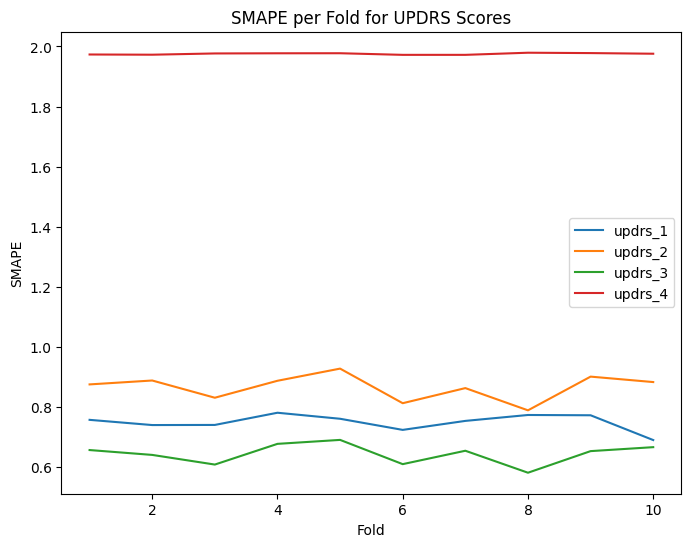

In [23]:
#use metrics from here
from sklearn.model_selection import KFold
import seaborn as sns

# Step 6: SVR Model Training with K-Fold Cross-Validation
svr_updrs_1 = SVR()
svr_updrs_2 = SVR()
svr_updrs_3 = SVR()
svr_updrs_4 = SVR()

# Define the number of folds for cross-validation
k_folds = 10
kf = KFold(n_splits=k_folds)

smape_scores_fold = []

for fold, (train_index, val_index) in enumerate(kf.split(X_train_imputed)):
    # Split the data into training and validation sets for each fold
    X_train_fold, X_val_fold = X_train_imputed.iloc[train_index], X_train_imputed.iloc[val_index]
    y_train_fold, y_val_fold = y_train_imputed.iloc[train_index], y_train_imputed.iloc[val_index]

    # Fit the SVR models on the training data for each fold
    svr_updrs_1.fit(X_train_fold, y_train_fold["updrs_1"])
    svr_updrs_2.fit(X_train_fold, y_train_fold["updrs_2"])
    svr_updrs_3.fit(X_train_fold, y_train_fold["updrs_3"])
    svr_updrs_4.fit(X_train_fold, y_train_fold["updrs_4"])

    # Make predictions on the validation data for each fold
    y_pred_updrs_1_fold = svr_updrs_1.predict(X_val_fold)
    y_pred_updrs_2_fold = svr_updrs_2.predict(X_val_fold)
    y_pred_updrs_3_fold = svr_updrs_3.predict(X_val_fold)
    y_pred_updrs_4_fold = svr_updrs_4.predict(X_val_fold)

    # Calculate SMAPE for each fold
    smape_scores = []
    targets_pred = [y_pred_updrs_1_fold, y_pred_updrs_2_fold, y_pred_updrs_3_fold, y_pred_updrs_4_fold]

    for i, col in enumerate(targets.columns):
        true_values = y_val_fold[col]
        predicted_values = targets_pred[i]
        smape = 2 * np.mean(np.abs(true_values - predicted_values) / (np.abs(true_values) + np.abs(predicted_values)))
        smape_scores.append(smape)
        print(f"SMAPE for {col} (Fold {fold+1}): {smape:.4f}")

    smape_scores_fold.append(smape_scores)

# Convert the list of SMAPE scores per fold to a NumPy array
smape_scores_fold = np.array(smape_scores_fold)

# Calculate the mean SMAPE across folds for each UPDRS score
mean_smape_scores = np.mean(smape_scores_fold, axis=0)
print(f"\nMean SMAPE across {k_folds} folds:")
for i, col in enumerate(targets.columns):
    print(f"Mean SMAPE for {col}: {mean_smape_scores[i]:.4f}")

# Plot SMAPE per fold using a line plot
plt.figure(figsize=(8, 6))
for i, col in enumerate(targets.columns):
    sns.lineplot(x=np.arange(1, k_folds+1), y=smape_scores_fold[:, i], label=col)
plt.xlabel("Fold")
plt.ylabel("SMAPE")
plt.title("SMAPE per Fold for UPDRS Scores")
plt.legend()
plt.show()


KNR

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

# Step 6: KNR Model Training with K-Fold Cross-Validation
knr_updrs_1 = KNeighborsRegressor()
knr_updrs_2 = KNeighborsRegressor()
knr_updrs_3 = KNeighborsRegressor()
knr_updrs_4 = KNeighborsRegressor()

smape_scores_fold = []
smape_scores = []

for fold, (train_index, val_index) in enumerate(kf.split(X_train_imputed)):
    # Split the data into training and validation sets for each fold
    X_train_fold, X_val_fold = X_train_imputed.iloc[train_index], X_train_imputed.iloc[val_index]
    y_train_fold, y_val_fold = y_train_imputed.iloc[train_index], y_train_imputed.iloc[val_index]

    # Fit the KNR models on the training data for each fold
    knr_updrs_1.fit(X_train_fold, y_train_fold["updrs_1"])
    knr_updrs_2.fit(X_train_fold, y_train_fold["updrs_2"])
    knr_updrs_3.fit(X_train_fold, y_train_fold["updrs_3"])
    knr_updrs_4.fit(X_train_fold, y_train_fold["updrs_4"])

    # Make predictions on the validation data for each fold
    y_pred_updrs_1_fold = knr_updrs_1.predict(X_val_fold)
    y_pred_updrs_2_fold = knr_updrs_2.predict(X_val_fold)
    y_pred_updrs_3_fold = knr_updrs_3.predict(X_val_fold)
    y_pred_updrs_4_fold = knr_updrs_4.predict(X_val_fold)

    # Calculate SMAPE for each fold
    targets_pred = [y_pred_updrs_1_fold, y_pred_updrs_2_fold, y_pred_updrs_3_fold, y_pred_updrs_4_fold]
    fold_smape = []

    for i, col in enumerate(targets.columns):
        true_values = y_val_fold[col]
        predicted_values = targets_pred[i]
        smape = 2 * np.mean(np.abs(true_values - predicted_values) / (np.abs(true_values) + np.abs(predicted_values)))
        fold_smape.append(smape)

    smape_scores_fold.append(np.mean(fold_smape))
    smape_scores.extend(fold_smape)

# Plot line plot between SMAPE per fold and SMAPE
plt.figure(figsize=(8, 6))
sns.lineplot(x=np.arange(1, k_folds+1), y=smape_scores_fold)
sns.lineplot(x=np.arange(1, k_folds+1), y=smape_scores, alpha=0.5)
plt.xlabel("Fold")
plt.ylabel("SMAPE")
plt.title("SMAPE per Fold and SMAPE")
plt.legend(["SMAPE per Fold", "SMAPE"])
plt.show()


In [ ]:
from sklearn.neighbors import KNeighborsRegressor
import matplotlib.pyplot as plt
import seaborn as sns

# Step 6: KNR Model Training with K-Fold Cross-Validation
knr_updrs_1 = KNeighborsRegressor()
knr_updrs_2 = KNeighborsRegressor()
knr_updrs_3 = KNeighborsRegressor()
knr_updrs_4 = KNeighborsRegressor()

smape_scores_fold = []
smape_scores = []

for fold, (train_index, val_index) in enumerate(kf.split(X_train_imputed)):
    # Split the data into training and validation sets for each fold
    X_train_fold, X_val_fold = X_train_imputed.iloc[train_index], X_train_imputed.iloc[val_index]
    y_train_fold, y_val_fold = y_train_imputed.iloc[train_index], y_train_imputed.iloc[val_index]

    # Fit the KNR models on the training data for each fold
    knr_updrs_1.fit(X_train_fold, y_train_fold["updrs_1"])
    knr_updrs_2.fit(X_train_fold, y_train_fold["updrs_2"])
    knr_updrs_3.fit(X_train_fold, y_train_fold["updrs_3"])
    knr_updrs_4.fit(X_train_fold, y_train_fold["updrs_4"])

    # Make predictions on the validation data for each fold
    y_pred_updrs_1_fold = knr_updrs_1.predict(X_val_fold)
    y_pred_updrs_2_fold = knr_updrs_2.predict(X_val_fold)
    y_pred_updrs_3_fold = knr_updrs_3.predict(X_val_fold)
    y_pred_updrs_4_fold = knr_updrs_4.predict(X_val_fold)

    # Calculate SMAPE for each fold
    targets_pred = [y_pred_updrs_1_fold, y_pred_updrs_2_fold, y_pred_updrs_3_fold, y_pred_updrs_4_fold]
    fold_smape = []

    for i, col in enumerate(targets.columns):
        true_values = y_val_fold[col]
        predicted_values = targets_pred[i]
        smape = 2 * np.mean(np.abs(true_values - predicted_values) / (np.abs(true_values) + np.abs(predicted_values)))
        fold_smape.append(smape)

    smape_scores_fold.append(np.mean(fold_smape))
    smape_scores.extend(fold_smape)

# Plot line plot between SMAPE per fold and SMAPE
plt.figure(figsize=(8, 6))
sns.lineplot(x=np.arange(1, k_folds+1), y=smape_scores_fold)
sns.lineplot(x=np.repeat(np.arange(1, k_folds+1), len(targets.columns)), y=smape_scores, alpha=0.5)
plt.xlabel("Fold")
plt.ylabel("SMAPE")
plt.title("SMAPE per Fold and SMAPE")
plt.legend(["SMAPE per Fold", "SMAPE"])
plt.show()


SMAPE for updrs_1 (Fold 1): 0.6625
SMAPE for updrs_2 (Fold 1): 0.7761
SMAPE for updrs_3 (Fold 1): 0.4389
SMAPE for updrs_4 (Fold 1): 1.7461
SMAPE for updrs_1 (Fold 2): 0.6243
SMAPE for updrs_2 (Fold 2): 0.7194
SMAPE for updrs_3 (Fold 2): 0.4315
SMAPE for updrs_4 (Fold 2): 1.6633
SMAPE for updrs_1 (Fold 3): 0.6383
SMAPE for updrs_2 (Fold 3): 0.6600
SMAPE for updrs_3 (Fold 3): 0.3822
SMAPE for updrs_4 (Fold 3): 1.7093
SMAPE for updrs_1 (Fold 4): 0.6813
SMAPE for updrs_2 (Fold 4): 0.7345
SMAPE for updrs_3 (Fold 4): 0.4573
SMAPE for updrs_4 (Fold 4): 1.7139
SMAPE for updrs_1 (Fold 5): 0.6630
SMAPE for updrs_2 (Fold 5): 0.7438
SMAPE for updrs_3 (Fold 5): 0.4582
SMAPE for updrs_4 (Fold 5): 1.7431
SMAPE for updrs_1 (Fold 6): 0.6243
SMAPE for updrs_2 (Fold 6): 0.6674
SMAPE for updrs_3 (Fold 6): 0.3954
SMAPE for updrs_4 (Fold 6): 1.6854
SMAPE for updrs_1 (Fold 7): 0.6613
SMAPE for updrs_2 (Fold 7): 0.6774
SMAPE for updrs_3 (Fold 7): 0.4354
SMAPE for updrs_4 (Fold 7): 1.6912
SMAPE for updrs_1 (F

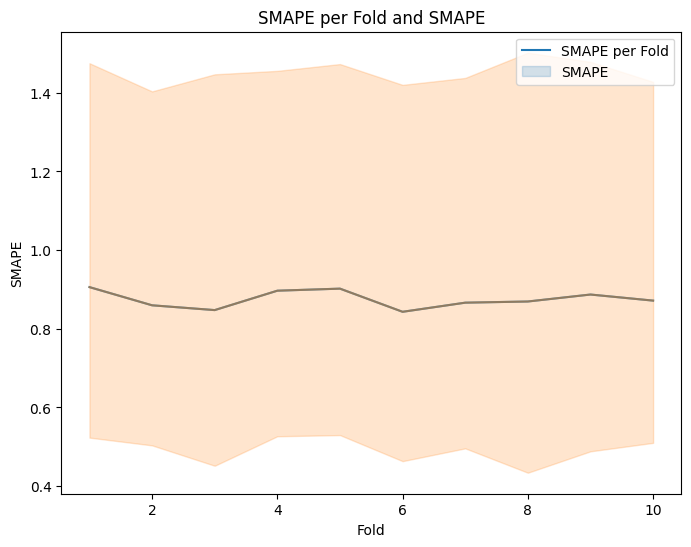

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
import matplotlib.pyplot as plt
import seaborn as sns

# Step 6: KNR Model Training with K-Fold Cross-Validation
knr_updrs_1 = KNeighborsRegressor()
knr_updrs_2 = KNeighborsRegressor()
knr_updrs_3 = KNeighborsRegressor()
knr_updrs_4 = KNeighborsRegressor()

smape_scores_fold = []
smape_scores = []

for fold, (train_index, val_index) in enumerate(kf.split(X_train_imputed)):
    # Split the data into training and validation sets for each fold
    X_train_fold, X_val_fold = X_train_imputed.iloc[train_index], X_train_imputed.iloc[val_index]
    y_train_fold, y_val_fold = y_train_imputed.iloc[train_index], y_train_imputed.iloc[val_index]

    # Fit the KNR models on the training data for each fold
    knr_updrs_1.fit(X_train_fold, y_train_fold["updrs_1"])
    knr_updrs_2.fit(X_train_fold, y_train_fold["updrs_2"])
    knr_updrs_3.fit(X_train_fold, y_train_fold["updrs_3"])
    knr_updrs_4.fit(X_train_fold, y_train_fold["updrs_4"])

    # Make predictions on the validation data for each fold
    y_pred_updrs_1_fold = knr_updrs_1.predict(X_val_fold)
    y_pred_updrs_2_fold = knr_updrs_2.predict(X_val_fold)
    y_pred_updrs_3_fold = knr_updrs_3.predict(X_val_fold)
    y_pred_updrs_4_fold = knr_updrs_4.predict(X_val_fold)

    # Calculate SMAPE for each fold
    targets_pred = [y_pred_updrs_1_fold, y_pred_updrs_2_fold, y_pred_updrs_3_fold, y_pred_updrs_4_fold]
    fold_smape = []

    for i, col in enumerate(targets.columns):
        true_values = y_val_fold[col]
        predicted_values = targets_pred[i]
        smape = 2 * np.mean(np.abs(true_values - predicted_values) / (np.abs(true_values) + np.abs(predicted_values)))
        fold_smape.append(smape)
        print(f"SMAPE for {col} (Fold {fold+1}): {smape:.4f}")

    smape_scores_fold.append(np.mean(fold_smape))
    smape_scores.extend(fold_smape)

# Plot line plot between SMAPE per fold and SMAPE
plt.figure(figsize=(8, 6))
sns.lineplot(x=np.arange(1, k_folds+1), y=smape_scores_fold)
sns.lineplot(x=np.repeat(np.arange(1, k_folds+1), len(targets.columns)), y=smape_scores, alpha=0.5)
plt.xlabel("Fold")
plt.ylabel("SMAPE")
plt.title("SMAPE per Fold and SMAPE")
plt.legend(["SMAPE per Fold", "SMAPE"])
plt.show()


Lasso Regressor


SMAPE for updrs_1 (Fold 1): 0.3015
SMAPE for updrs_2 (Fold 1): 0.3952
SMAPE for updrs_3 (Fold 1): 0.2329
SMAPE for updrs_4 (Fold 1): 1.6091
SMAPE for updrs_1 (Fold 2): 0.2381
SMAPE for updrs_2 (Fold 2): 0.3786
SMAPE for updrs_3 (Fold 2): 0.1823
SMAPE for updrs_4 (Fold 2): 1.6600
SMAPE for updrs_1 (Fold 3): 0.2551
SMAPE for updrs_2 (Fold 3): 0.3517
SMAPE for updrs_3 (Fold 3): 0.1663
SMAPE for updrs_4 (Fold 3): 1.6570
SMAPE for updrs_1 (Fold 4): 0.2978
SMAPE for updrs_2 (Fold 4): 0.4043
SMAPE for updrs_3 (Fold 4): 0.2326
SMAPE for updrs_4 (Fold 4): 1.6939
SMAPE for updrs_1 (Fold 5): 0.2508
SMAPE for updrs_2 (Fold 5): 0.4263
SMAPE for updrs_3 (Fold 5): 0.2189
SMAPE for updrs_4 (Fold 5): 1.7108
SMAPE for updrs_1 (Fold 6): 0.2715
SMAPE for updrs_2 (Fold 6): 0.3129
SMAPE for updrs_3 (Fold 6): 0.1878
SMAPE for updrs_4 (Fold 6): 1.6743
SMAPE for updrs_1 (Fold 7): 0.2794
SMAPE for updrs_2 (Fold 7): 0.3439
SMAPE for updrs_3 (Fold 7): 0.1912
SMAPE for updrs_4 (Fold 7): 1.6205
SMAPE for updrs_1 (F

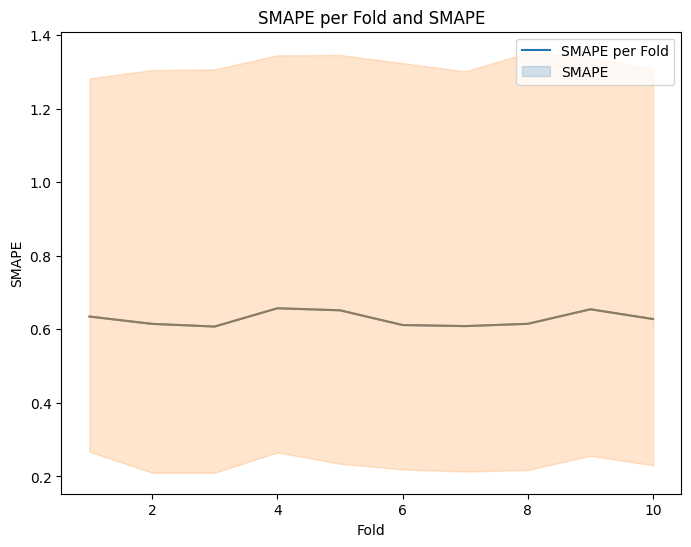

In [25]:
from sklearn.linear_model import Lasso

# Step 6: Lasso Regression Model Training with K-Fold Cross-Validation
lasso_updrs_1 = Lasso()
lasso_updrs_2 = Lasso()
lasso_updrs_3 = Lasso()
lasso_updrs_4 = Lasso()

smape_scores_fold = []
smape_scores = []

for fold, (train_index, val_index) in enumerate(kf.split(X_train_imputed)):
    # Split the data into training and validation sets for each fold
    X_train_fold, X_val_fold = X_train_imputed.iloc[train_index], X_train_imputed.iloc[val_index]
    y_train_fold, y_val_fold = y_train_imputed.iloc[train_index], y_train_imputed.iloc[val_index]

    # Fit the Lasso models on the training data for each fold
    lasso_updrs_1.fit(X_train_fold, y_train_fold["updrs_1"])
    lasso_updrs_2.fit(X_train_fold, y_train_fold["updrs_2"])
    lasso_updrs_3.fit(X_train_fold, y_train_fold["updrs_3"])
    lasso_updrs_4.fit(X_train_fold, y_train_fold["updrs_4"])

    # Make predictions on the validation data for each fold
    y_pred_updrs_1_fold = lasso_updrs_1.predict(X_val_fold)
    y_pred_updrs_2_fold = lasso_updrs_2.predict(X_val_fold)
    y_pred_updrs_3_fold = lasso_updrs_3.predict(X_val_fold)
    y_pred_updrs_4_fold = lasso_updrs_4.predict(X_val_fold)

    # Calculate SMAPE for each fold
    targets_pred = [y_pred_updrs_1_fold, y_pred_updrs_2_fold, y_pred_updrs_3_fold, y_pred_updrs_4_fold]
    fold_smape = []

    for i, col in enumerate(targets.columns):
        true_values = y_val_fold[col]
        predicted_values = targets_pred[i]
        smape = 2 * np.mean(np.abs(true_values - predicted_values) / (np.abs(true_values) + np.abs(predicted_values)))
        fold_smape.append(smape)
        print(f"SMAPE for {col} (Fold {fold+1}): {smape:.4f}")

    smape_scores_fold.append(np.mean(fold_smape))
    smape_scores.extend(fold_smape)

# Plot line plot between SMAPE per fold and SMAPE
plt.figure(figsize=(8, 6))
sns.lineplot(x=np.arange(1, k_folds+1), y=smape_scores_fold)
sns.lineplot(x=np.repeat(np.arange(1, k_folds+1), len(targets.columns)), y=smape_scores, alpha=0.5)
plt.xlabel("Fold")
plt.ylabel("SMAPE")
plt.title("SMAPE per Fold and SMAPE")
plt.legend(["SMAPE per Fold", "SMAPE"])
plt.show()


Decision Tree Regressor

SMAPE for updrs_1 (Fold 1): 0.0088
SMAPE for updrs_2 (Fold 1): 0.0125
SMAPE for updrs_3 (Fold 1): 0.0287
SMAPE for updrs_4 (Fold 1): 0.0000
SMAPE for updrs_1 (Fold 2): 0.0113
SMAPE for updrs_2 (Fold 2): 0.0000
SMAPE for updrs_3 (Fold 2): 0.0333
SMAPE for updrs_4 (Fold 2): 0.0009
SMAPE for updrs_1 (Fold 3): 0.0058
SMAPE for updrs_2 (Fold 3): 0.0183
SMAPE for updrs_3 (Fold 3): 0.0168
SMAPE for updrs_4 (Fold 3): 0.0000
SMAPE for updrs_1 (Fold 4): 0.0063
SMAPE for updrs_2 (Fold 4): 0.0323
SMAPE for updrs_3 (Fold 4): 0.0060
SMAPE for updrs_4 (Fold 4): 0.0000
SMAPE for updrs_1 (Fold 5): 0.0000
SMAPE for updrs_2 (Fold 5): 0.0011
SMAPE for updrs_3 (Fold 5): 0.0344
SMAPE for updrs_4 (Fold 5): 0.0000
SMAPE for updrs_1 (Fold 6): 0.0000
SMAPE for updrs_2 (Fold 6): 0.0000
SMAPE for updrs_3 (Fold 6): 0.0058
SMAPE for updrs_4 (Fold 6): 0.0024
SMAPE for updrs_1 (Fold 7): 0.0000
SMAPE for updrs_2 (Fold 7): 0.0021
SMAPE for updrs_3 (Fold 7): 0.0001
SMAPE for updrs_4 (Fold 7): 0.0000
SMAPE for updrs_1 (F

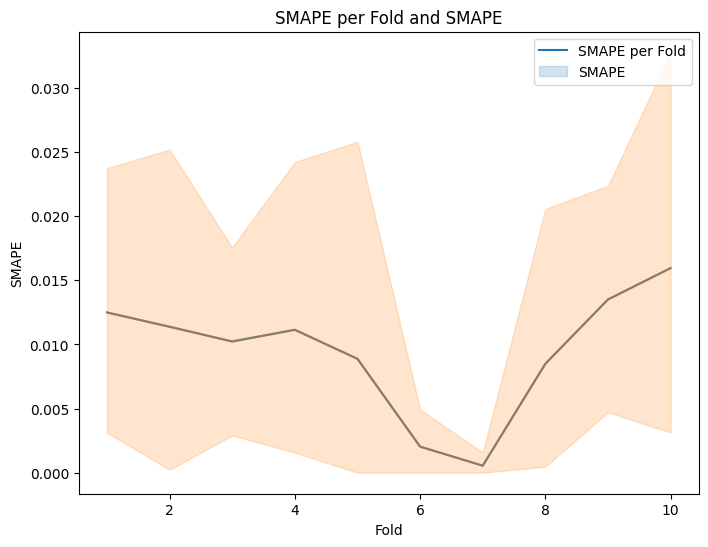

In [26]:
from sklearn.tree import DecisionTreeRegressor

# Step 6: Decision Tree Regression Model Training with K-Fold Cross-Validation
dt_updrs_1 = DecisionTreeRegressor()
dt_updrs_2 = DecisionTreeRegressor()
dt_updrs_3 = DecisionTreeRegressor()
dt_updrs_4 = DecisionTreeRegressor()

smape_scores_fold = []
smape_scores = []

for fold, (train_index, val_index) in enumerate(kf.split(X_train_imputed)):
    # Split the data into training and validation sets for each fold
    X_train_fold, X_val_fold = X_train_imputed.iloc[train_index], X_train_imputed.iloc[val_index]
    y_train_fold, y_val_fold = y_train_imputed.iloc[train_index], y_train_imputed.iloc[val_index]

    # Fit the Decision Tree models on the training data for each fold
    dt_updrs_1.fit(X_train_fold, y_train_fold["updrs_1"])
    dt_updrs_2.fit(X_train_fold, y_train_fold["updrs_2"])
    dt_updrs_3.fit(X_train_fold, y_train_fold["updrs_3"])
    dt_updrs_4.fit(X_train_fold, y_train_fold["updrs_4"])

    # Make predictions on the validation data for each fold
    y_pred_updrs_1_fold = dt_updrs_1.predict(X_val_fold)
    y_pred_updrs_2_fold = dt_updrs_2.predict(X_val_fold)
    y_pred_updrs_3_fold = dt_updrs_3.predict(X_val_fold)
    y_pred_updrs_4_fold = dt_updrs_4.predict(X_val_fold)

    # Calculate SMAPE for each fold
    targets_pred = [y_pred_updrs_1_fold, y_pred_updrs_2_fold, y_pred_updrs_3_fold, y_pred_updrs_4_fold]
    fold_smape = []

    for i, col in enumerate(targets.columns):
        true_values = y_val_fold[col]
        predicted_values = targets_pred[i]
        smape = 2 * np.mean(np.abs(true_values - predicted_values) / (np.abs(true_values) + np.abs(predicted_values)))
        fold_smape.append(smape)
        print(f"SMAPE for {col} (Fold {fold+1}): {smape:.4f}")

    smape_scores_fold.append(np.mean(fold_smape))
    smape_scores.extend(fold_smape)

# Plot line plot between SMAPE per fold and SMAPE
plt.figure(figsize=(8, 6))
sns.lineplot(x=np.arange(1, k_folds+1), y=smape_scores_fold)
sns.lineplot(x=np.repeat(np.arange(1, k_folds+1), len(targets.columns)), y=smape_scores, alpha=0.5)
plt.xlabel("Fold")
plt.ylabel("SMAPE")
plt.title("SMAPE per Fold and SMAPE")
plt.legend(["SMAPE per Fold", "SMAPE"])
plt.show()


Tensorflow

In [27]:
import tensorflow as tf
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import numpy as np

# Step 1: Prepare the Data
data = train_copy[features + ["upd23b_clinical_state_on_medication", "visit_month"]]
targets = train_copy[["updrs_1", "updrs_2", "updrs_3", "updrs_4"]]

# Step 2: Convert non-numeric column to numeric representation
le = LabelEncoder()
data["upd23b_clinical_state_on_medication"] = le.fit_transform(data["upd23b_clinical_state_on_medication"])

# Step 3: Impute Missing Values in Features
numeric_features = features + ["visit_month"]
non_numeric_features = ["upd23b_clinical_state_on_medication"]
numeric_imputer = SimpleImputer(strategy='median')
non_numeric_imputer = SimpleImputer(strategy='most_frequent')

data[numeric_features] = numeric_imputer.fit_transform(data[numeric_features])
data[non_numeric_features] = non_numeric_imputer.fit_transform(data[non_numeric_features])

# Step 4: Impute Missing Values in Targets
target_imputer = SimpleImputer(strategy='median')
targets_imputed = target_imputer.fit_transform(targets)

# Step 5: Split the Data
X_train, X_test, y_train, y_test = train_test_split(data, targets_imputed, test_size=0.2, random_state=42)

# Step 6: Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 7: TensorFlow Model Training
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(4)
])

model.compile(optimizer='adam', loss='mean_absolute_error')

model.fit(X_train_scaled, y_train, epochs=10, batch_size=32)

# Step 8: Model Prediction
y_pred = model.predict(X_test_scaled)

# Step 9: Calculate SMAPE
smape_scores = []
for i, col in enumerate(targets.columns):
    true_values = y_test[:, i]
    predicted_values = y_pred[:, i]
    smape = 2 * np.mean(np.abs(true_values - predicted_values) / (np.abs(true_values) + np.abs(predicted_values)))
    smape_scores.append(smape)

# Calculate overall SMAPE
overall_smape = np.mean(smape_scores)

print(f"Overall SMAPE: {overall_smape:.4f}")


Epoch 1/10
121/121 [==============================] - 2s 2ms/step - loss: 7.4339
Epoch 2/10
121/121 [==============================] - 1s 5ms/step - loss: 3.3996
Epoch 3/10
121/121 [==============================] - 1s 4ms/step - loss: 1.4870
Epoch 4/10
121/121 [==============================] - 0s 2ms/step - loss: 0.8738
Epoch 5/10
121/121 [==============================] - 0s 2ms/step - loss: 0.7127
Epoch 6/10
121/121 [==============================] - 0s 2ms/step - loss: 0.5936
Epoch 7/10
121/121 [==============================] - 0s 2ms/step - loss: 0.5295
Epoch 8/10
121/121 [==============================] - 0s 2ms/step - loss: 0.4785
Epoch 9/10
121/121 [==============================] - 0s 2ms/step - loss: 0.4225
Epoch 10/10
31/31 [==============================] - 0s 1ms/step
Overall SMAPE: 0.6044


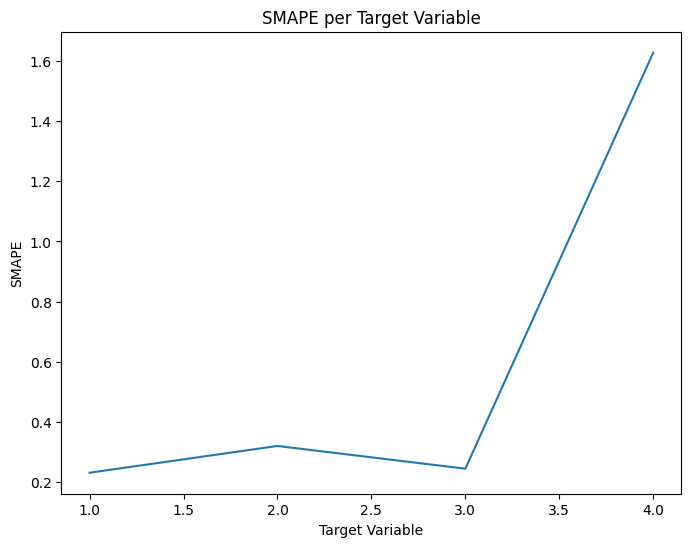

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Line plot
plt.figure(figsize=(8, 6))
sns.lineplot(x=np.arange(1, len(smape_scores)+1), y=smape_scores)
plt.xlabel("Target Variable")
plt.ylabel("SMAPE")
plt.title("SMAPE per Target Variable")
plt.show()


SMAPE for Epoch 1: 1.9993
SMAPE for Epoch 2: 1.9986
SMAPE for Epoch 3: 1.9993
SMAPE for Epoch 4: 1.9961
SMAPE for Epoch 5: 1.9992
SMAPE for Epoch 6: 1.9990
SMAPE for Epoch 7: 1.9986
SMAPE for Epoch 8: 1.9988
SMAPE for Epoch 9: 1.9802
SMAPE for Epoch 10: 1.9981


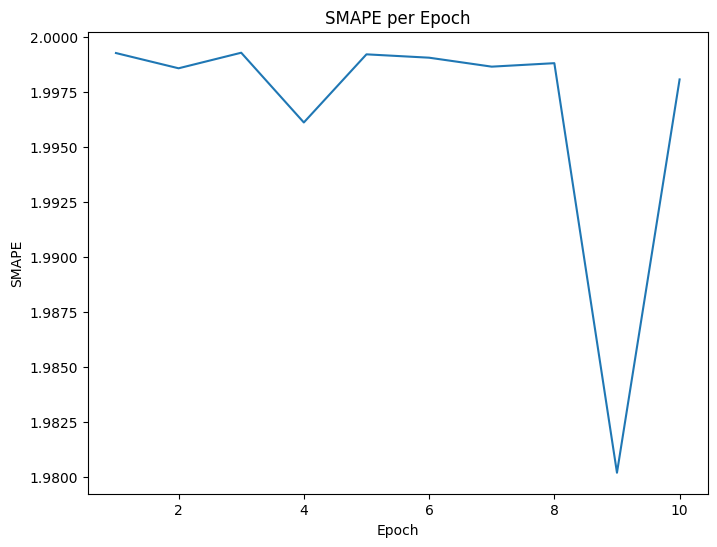

In [28]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.metrics import mean_absolute_error
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Prepare the Data
data = train_copy[features + ["upd23b_clinical_state_on_medication", "visit_month"]]
targets = train_copy[["updrs_1", "updrs_2", "updrs_3", "updrs_4"]]

# Convert non-numeric column to numeric representation
le = LabelEncoder()
data["upd23b_clinical_state_on_medication"] = le.fit_transform(data["upd23b_clinical_state_on_medication"])

# Step 2: Impute Missing Values in Features
numeric_features = features + ["visit_month"]
non_numeric_features = ["upd23b_clinical_state_on_medication"]
numeric_imputer = SimpleImputer(strategy='median')
non_numeric_imputer = SimpleImputer(strategy='most_frequent')

data[numeric_features] = numeric_imputer.fit_transform(data[numeric_features])
data[non_numeric_features] = non_numeric_imputer.fit_transform(data[non_numeric_features])

# Step 3: Impute Missing Values in Targets
target_imputer = SimpleImputer(strategy='median')
targets_imputed = target_imputer.fit_transform(targets)

# Step 4: Split the Data
X_train, X_test, y_train, y_test = train_test_split(data, targets_imputed, test_size=0.2, random_state=42)

# Step 5: Convert Data to PyTorch Tensors
X_train_tensor = torch.tensor(X_train.values, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test.values, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32)

# Step 6: Define the Model
class RegressionModel(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(RegressionModel, self).__init__()
        self.fc1 = nn.Linear(input_dim, 64)
        self.fc2 = nn.Linear(64, 64)
        self.fc3 = nn.Linear(64, output_dim)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x

model = RegressionModel(X_train_tensor.shape[1], y_train_tensor.shape[1])

# Step 7: Define the Loss Function and Optimizer
criterion = nn.L1Loss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Step 8: Training the Model
num_epochs = 10
batch_size = 32
smape_scores = []

for epoch in range(num_epochs):
    model.train()
    for i in range(0, len(X_train_tensor), batch_size):
        inputs = X_train_tensor[i:i+batch_size]
        targets = y_train_tensor[i:i+batch_size]

        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, targets)
        loss.backward()
        optimizer.step()

    model.eval()
    with torch.no_grad():
        y_pred = model(X_test_tensor)
        smape = 2 * torch.mean(torch.abs(y_test_tensor - y_pred) / (torch.abs(y_test_tensor) + torch.abs(y_pred)))
        smape_scores.append(smape.item())
        print(f"SMAPE for Epoch {epoch+1}: {smape:.4f}")

# Step 9: Plot the SMAPE Scores
plt.figure(figsize=(8, 6))
sns.lineplot(x=np.arange(1, len(smape_scores)+1), y=smape_scores)
plt.xlabel("Epoch")
plt.ylabel("SMAPE")
plt.title("SMAPE per Epoch")
plt.show()


In [29]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.metrics import mean_absolute_error
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Prepare the Data
data = train_copy[features + ["upd23b_clinical_state_on_medication", "visit_month"]]
targets = train_copy[["updrs_1", "updrs_2", "updrs_3", "updrs_4"]]

# Convert non-numeric column to numeric representation
le = LabelEncoder()
data["upd23b_clinical_state_on_medication"] = le.fit_transform(data["upd23b_clinical_state_on_medication"])

# Step 2: Impute Missing Values in Features
numeric_features = features + ["visit_month"]
non_numeric_features = ["upd23b_clinical_state_on_medication"]
numeric_imputer = SimpleImputer(strategy='median')
non_numeric_imputer = SimpleImputer(strategy='most_frequent')

data[numeric_features] = numeric_imputer.fit_transform(data[numeric_features])
data[non_numeric_features] = non_numeric_imputer.fit_transform(data[non_numeric_features])

# Step 3: Impute Missing Values in Targets
target_imputer = SimpleImputer(strategy='median')
targets_imputed = target_imputer.fit_transform(targets)

# Step 4: Split the Data
X_train, X_test, y_train, y_test = train_test_split(data, targets_imputed, test_size=0.2, random_state=42)

# Step 5: Convert Data to PyTorch Tensors
X_train_tensor = torch.tensor(X_train.values, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test.values, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32)

# Step 6: Define the Model
class RegressionModel(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(RegressionModel, self).__init__()
        self.fc1 = nn.Linear(input_dim, 64)
        self.fc2 = nn.Linear(64, 64)
        self.fc3 = nn.Linear(64, output_dim)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x

model = RegressionModel(X_train_tensor.shape[1], y_train_tensor.shape[1])

# Step 7: Define the Loss Function and Optimizer
criterion = nn.L1Loss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Step 8: Training the Model
num_epochs = 10
batch_size = 32
smape_scores = []

for epoch in range(num_epochs):
    model.train()
    for i in range(0, len(X_train_tensor), batch_size):
        inputs = X_train_tensor[i:i+batch_size]
        targets = y_train_tensor[i:i+batch_size]

        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, targets)
        loss.backward()
        optimizer.step()

    model.eval()
    with torch.no_grad():
        y_pred = model(X_test_tensor)
        overall_smape = 2 * torch.mean(torch.abs(y_test_tensor - y_pred) / (torch.abs(y_test_tensor) + torch.abs(y_pred)))
        print(f"Overall SMAPE: {overall_smape:.4f}")

Overall SMAPE: 1.9990
Overall SMAPE: 1.9989
Overall SMAPE: 1.9994
Overall SMAPE: 1.9975
Overall SMAPE: 1.9993
Overall SMAPE: 1.9989
Overall SMAPE: 1.9939
Overall SMAPE: 1.9974
Overall SMAPE: 1.9941
Overall SMAPE: 1.9972


Fold 1: SMAPE = 0.9174
Fold 2: SMAPE = 0.9462
Fold 3: SMAPE = 0.9387
Fold 4: SMAPE = 0.9327
Fold 5: SMAPE = 0.9186
Fold 6: SMAPE = 0.9275
Fold 7: SMAPE = 0.9462
Fold 8: SMAPE = 0.9514
Fold 9: SMAPE = 0.9630
Fold 10: SMAPE = 0.9608
Overall SMAPE: 0.9402


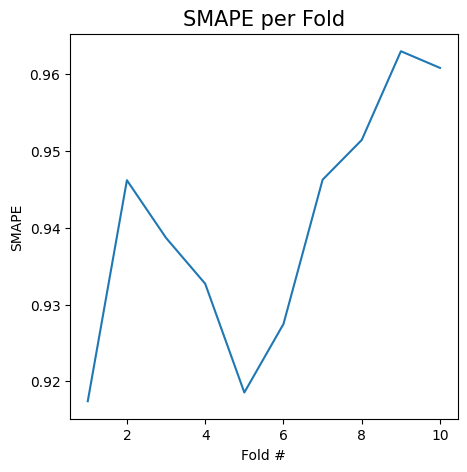

In [30]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import KFold
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Prepare the Data
# Assuming you have already prepared the data as X_train_scaled, y_train, and n_folds

# Convert data to PyTorch tensors
X_train_tensor = torch.Tensor(X_train_scaled)
y_train_tensor = torch.Tensor(y_train)

# Define the Deep Learning Model
class RegressionModel(nn.Module):
    def __init__(self, input_size):
        super(RegressionModel, self).__init__()
        self.fc1 = nn.Linear(input_size, 64)
        self.fc2 = nn.Linear(64, 64)
        self.fc3 = nn.Linear(64, 4)  # Output layer with 4 units for the 4 target variables

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x

# Function to calculate SMAPE
def calculate_smape(targets, predictions):
    numerator = torch.abs(targets - predictions)
    denominator = torch.abs(targets) + torch.abs(predictions)
    smape = 2 * torch.mean(numerator / denominator)
    return smape.item()

# Perform k-fold cross-validation
k = 10  # Number of folds
smape_scores = []

kf = KFold(n_splits=k, shuffle=True, random_state=42)

for fold, (train_index, val_index) in enumerate(kf.split(X_train_tensor)):
    # Prepare the data for the current fold
    X_train_fold = X_train_tensor[train_index]
    y_train_fold = y_train_tensor[train_index]
    X_val_fold = X_train_tensor[val_index]
    y_val_fold = y_train_tensor[val_index]

    # Initialize the model
    model = RegressionModel(X_train_scaled.shape[1])

    # Define the loss function and optimizer
    criterion = nn.L1Loss()
    optimizer = optim.Adam(model.parameters(), lr=0.001)

    # Train the model
    num_epochs = 100

    for epoch in range(num_epochs):
        optimizer.zero_grad()
        outputs = model(X_train_fold)
        loss = criterion(outputs, y_train_fold)
        loss.backward()
        optimizer.step()

    # Evaluate the model on the validation set
    with torch.no_grad():
        y_pred_val = model(X_val_fold)
        smape = calculate_smape(y_val_fold, y_pred_val)
        smape_scores.append(smape)
        print(f"Fold {fold+1}: SMAPE = {smape:.4f}")

# Calculate overall SMAPE
overall_smape = np.mean(smape_scores)
print(f"Overall SMAPE: {overall_smape:.4f}")

# Plot SMAPE per Fold
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(5, 5))
data = pd.DataFrame({"Fold": [x + 1 for x in range(k)], "SMAPE": smape_scores})
_ = sns.lineplot(x="Fold", y="SMAPE", data=data, ax=ax)
_ = ax.set_title("SMAPE per Fold", fontsize=15)
_ = ax.set_ylabel("SMAPE")
_ = ax.set_xlabel("Fold #")
plt.show()



Hyperparameter Oportuna Model

In [ ]:
!pip install optuna


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 390.6/390.6 kB 6.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 17.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.7/78.7 kB 7.5 MB/s eta 0:00:00


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import KFold
import numpy as np
import matplotlib.pyplot as plt
import optuna

# Step 1: Prepare the Data
# Assuming you have already prepared the data as X_train_scaled, y_train, and n_folds

# Convert data to PyTorch tensors
X_train_tensor = torch.Tensor(X_train_scaled)
y_train_tensor = torch.Tensor(y_train)

# Define the Deep Learning Model
class RegressionModel(nn.Module):
    def __init__(self, input_size, trial):
        super(RegressionModel, self).__init__()
        self.fc1 = nn.Linear(input_size, trial.suggest_int("hidden_size1", 32, 128))
        self.fc2 = nn.Linear(trial.suggest_int("hidden_size1", 32, 128), trial.suggest_int("hidden_size2", 32, 128))
        self.fc3 = nn.Linear(trial.suggest_int("hidden_size2", 32, 128), 4)  # Output layer with 4 units for the 4 target variables

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x

# Function to calculate SMAPE
def calculate_smape(targets, predictions):
    numerator = torch.abs(targets - predictions)
    denominator = torch.abs(targets) + torch.abs(predictions)
    smape = 2 * torch.mean(numerator / denominator)
    return smape.item()

# Objective function for Optuna optimization
def objective(trial):
    # Perform k-fold cross-validation
    k = 10  # Number of folds
    smape_scores = []

    kf = KFold(n_splits=k, shuffle=True, random_state=42)

    for fold, (train_index, val_index) in enumerate(kf.split(X_train_tensor)):
        # Prepare the data for the current fold
        X_train_fold = X_train_tensor[train_index]
        y_train_fold = y_train_tensor[train_index]
        X_val_fold = X_train_tensor[val_index]
        y_val_fold = y_train_tensor[val_index]

        # Initialize the model
        model = RegressionModel(X_train_scaled.shape[1], trial)

        # Define the loss function and optimizer
        criterion = nn.L1Loss()
        optimizer = optim.Adam(model.parameters(), lr=trial.suggest_float("lr", 1e-5, 1e-1, log=True))

        # Train the model
        num_epochs = 100

        for epoch in range(num_epochs):
            optimizer.zero_grad()
            outputs = model(X_train_fold)
            loss = criterion(outputs, y_train_fold)
            loss.backward()
            optimizer.step()

        # Evaluate the model on the validation set
        with torch.no_grad():
            y_pred_val = model(X_val_fold)
            smape = calculate_smape(y_val_fold, y_pred_val)
            smape_scores.append(smape)

    # Calculate overall SMAPE
    overall_smape = np.mean(smape_scores)

    return overall_smape

# Run the Hyperparameter Optimization with Optuna
study = optuna.create_study(direction="minimize")
study.optimize(objective, n_trials=50)

# Get the best hyperparameters and best score
best_params = study.best_params
best_score = study.best_value
print("Best Hyperparameters:", best_params)
print("Best Score:", best_score)

# Train the final model with the best hyperparameters
best_model = RegressionModel(X_train_scaled.shape[1], best_params)

# ...

# Continue with training the best model, calculating SMAPE, and plotting the results


[I 2023-06-05 04:22:20,259] A new study created in memory with name: no-name-21db83cf-a132-4e06-988c-397c80445457
[I 2023-06-05 04:22:36,065] Trial 0 finished with value: 0.7154281795024872 and parameters: {'hidden_size1': 68, 'hidden_size2': 62, 'lr': 0.03414992154842453}. Best is trial 0 with value: 0.7154281795024872.
[I 2023-06-05 04:23:02,003] Trial 1 finished with value: 0.9014027953147888 and parameters: {'hidden_size1': 54, 'hidden_size2': 116, 'lr': 0.001299406109175672}. Best is trial 0 with value: 0.7154281795024872.
[I 2023-06-05 04:23:18,266] Trial 2 finished with value: 0.7996271014213562 and parameters: {'hidden_size1': 77, 'hidden_size2': 59, 'lr': 0.002962895782252705}. Best is trial 0 with value: 0.7154281795024872.
[I 2023-06-05 04:23:26,544] Trial 3 finished with value: 0.7482914626598358 and parameters: {'hidden_size1': 35, 'hidden_size2': 78, 'lr': 0.00586500502440266}. Best is trial 0 with value: 0.7154281795024872.
[I 2023-06-05 04:23:35,399] Trial 4 finished wi

Best Hyperparameters: {'hidden_size1': 107, 'hidden_size2': 84, 'lr': 0.0114963483694063}
Best Score: 0.6603260934352875


AttributeError: ignored

In [31]:
train_copy.head()

,visit_id,patient_id,visit_month,updrs_1,updrs_2,updrs_3,updrs_4,upd23b_clinical_state_on_medication,O00391,O00533,...,QALPQVR,SGNIPAGTTVDTK,RLGMFNIQHC(UniMod_4)K,EPQVYTLPPSRDELTK,PALEDLR,QKVEPLRAELQEGAR,RTHLPEVFLSK,INHC(UniMod_4)RFDEFFSEGC(UniMod_4)APGSKK,EQPPSLTR,AGC(UniMod_4)VAESTAVC(UniMod_4)R
0,55_0,55,0,10.0,6.0,15.0,NaN,NaN,11254.3,732430.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,55_3,55,3,10.0,7.0,25.0,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,55_6,55,6,8.0,10.0,34.0,NaN,NaN,13163.6,630465.0,...,0.0,0.0,0.0,0.0,50231.1,2588340.0,0.0,455333.0,0.0,0.0
3,55_9,55,9,8.0,9.0,30.0,0.0,On,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,55_12,55,12,10.0,10.0,41.0,0.0,On,15257.6,815083.0,...,25589.4,65762.6,0.0,0.0,24770.9,0.0,0.0,0.0,0.0,0.0


In [ ]:
#temp work


Decision Tree Regressor

Fold 1 - updrs_1: SMAPE = 0.0000
Fold 2 - updrs_1: SMAPE = 0.0000
Fold 3 - updrs_1: SMAPE = 0.0026
Fold 4 - updrs_1: SMAPE = 0.0078
Fold 5 - updrs_1: SMAPE = 0.0000
Fold 6 - updrs_1: SMAPE = 0.0000
Fold 7 - updrs_1: SMAPE = 0.0000
Fold 8 - updrs_1: SMAPE = 0.0000
Fold 9 - updrs_1: SMAPE = 0.0000
Fold 10 - updrs_1: SMAPE = 0.0000
Fold 1 - updrs_2: SMAPE = 0.0026
Fold 2 - updrs_2: SMAPE = 0.0000
Fold 3 - updrs_2: SMAPE = 0.0155
Fold 4 - updrs_2: SMAPE = 0.0026
Fold 5 - updrs_2: SMAPE = 0.0026
Fold 6 - updrs_2: SMAPE = 0.0000
Fold 7 - updrs_2: SMAPE = 0.0026
Fold 8 - updrs_2: SMAPE = 0.0000
Fold 9 - updrs_2: SMAPE = 0.0026
Fold 10 - updrs_2: SMAPE = 0.0026
Fold 1 - updrs_3: SMAPE = 0.0103
Fold 2 - updrs_3: SMAPE = 0.0026
Fold 3 - updrs_3: SMAPE = 0.0052
Fold 4 - updrs_3: SMAPE = 0.0000
Fold 5 - updrs_3: SMAPE = 0.0258
Fold 6 - updrs_3: SMAPE = 0.0026
Fold 7 - updrs_3: SMAPE = 0.0078
Fold 8 - updrs_3: SMAPE = 0.0000
Fold 9 - updrs_3: SMAPE = 0.0000
Fold 10 - updrs_3: SMAPE = 0.0026
Fold 1 

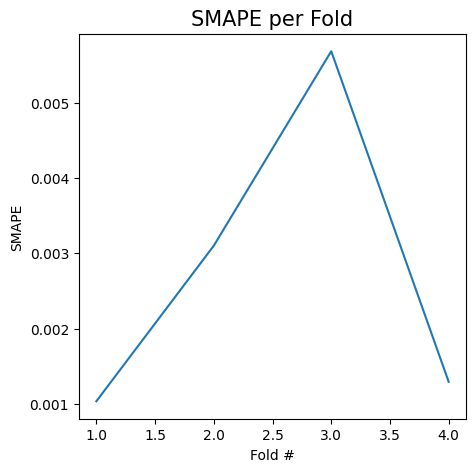

In [32]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder
import numpy as np

# Step 1: Prepare the Data
data = train_copy[features + ["upd23b_clinical_state_on_medication", "visit_month"]]
targets = train_copy[["updrs_1", "updrs_2", "updrs_3", "updrs_4"]]

# Step 2: Convert non-numeric column to numeric representation
le = LabelEncoder()
data["upd23b_clinical_state_on_medication"] = le.fit_transform(data["upd23b_clinical_state_on_medication"])

# Step 3: Impute Missing Values in Features
numeric_features = features + ["visit_month"]
non_numeric_features = ["upd23b_clinical_state_on_medication"]
numeric_imputer = SimpleImputer(strategy='median')
non_numeric_imputer = SimpleImputer(strategy='most_frequent')

data[numeric_features] = numeric_imputer.fit_transform(data[numeric_features])
data[non_numeric_features] = non_numeric_imputer.fit_transform(data[non_numeric_features])

# Step 4: Impute Missing Values in Targets
target_imputer = SimpleImputer(strategy='median')
targets_imputed = target_imputer.fit_transform(targets)

# Step 5: Split the Data
X_train, X_test, y_train, y_test = train_test_split(data, targets_imputed, test_size=0.2, random_state=42)

# Step 6: Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 7: Decision Tree Regressor Training
dt_updrs_1 = DecisionTreeRegressor()
dt_updrs_2 = DecisionTreeRegressor()
dt_updrs_3 = DecisionTreeRegressor()
dt_updrs_4 = DecisionTreeRegressor()

# Step 8: Perform k-fold cross-validation
k = 10  # Number of folds
smape_scores = []

for i, col in enumerate(targets.columns):
    dt = [dt_updrs_1, dt_updrs_2, dt_updrs_3, dt_updrs_4][i]
    scores = cross_val_score(dt, X_train_scaled, y_train[:, i], cv=k, scoring='neg_mean_absolute_error')
    smape = -np.mean(scores)
    smape_scores.append(smape)

    # Print SMAPE for each fold
    for fold, score in enumerate(scores):
        print(f"Fold {fold+1} - {col}: SMAPE = {-score:.4f}")

# Calculate overall SMAPE
overall_smape = np.mean(smape_scores)

print(f"\nOverall SMAPE: {overall_smape:.4f}")

# Find the smallest SMAPE
smallest_smape = np.min(smape_scores)
smallest_smape_index = np.argmin(smape_scores)

print(f"\nSmallest SMAPE: {smallest_smape:.4f} (Fold {smallest_smape_index+1})")

# Plot SMAPE per Fold
n_folds = len(smape_scores)
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(5, 5))

data = pd.DataFrame({"Fold": [x + 1 for x in range(n_folds)], "SMAPE": smape_scores})
_ = sns.lineplot(x="Fold", y="SMAPE", data=data, ax=ax)
_ = ax.set_title("SMAPE per Fold", fontsize=15)
_ = ax.set_ylabel("SMAPE")
_ = ax.set_xlabel("Fold #")

plt.show()


Decision Tree Regressor

Fold 1: SMAPE = 0.5891
Fold 2: SMAPE = 0.6286
Fold 3: SMAPE = 0.6395
Fold 4: SMAPE = 0.5724
Fold 5: SMAPE = 0.6234
Fold 6: SMAPE = 0.6505
Fold 7: SMAPE = 0.6996
Fold 8: SMAPE = 0.6324
Fold 9: SMAPE = 0.6195
Fold 10: SMAPE = 0.5594
Overall SMAPE: 0.6214


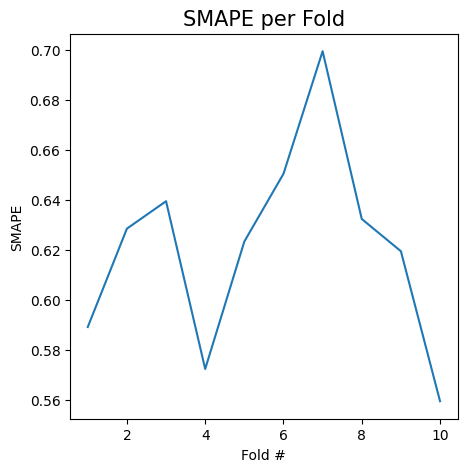

In [33]:
#Finally this is being used
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import KFold
from sklearn.metrics import mean_absolute_error
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Prepare the Data
# Assuming you have already prepared the data as X_train_scaled, y_train, and n_folds

# Perform k-fold cross-validation
k = 10  # Number of folds
smape_scores = []

kf = KFold(n_splits=k, shuffle=True, random_state=42)

for fold, (train_index, val_index) in enumerate(kf.split(X_train_scaled)):
    # Prepare the data for the current fold
    X_train_fold = X_train_scaled[train_index]
    y_train_fold = y_train[train_index]
    X_val_fold = X_train_scaled[val_index]
    y_val_fold = y_train[val_index]

    # Initialize the model
    model = DecisionTreeRegressor()

    # Train the model
    model.fit(X_train_fold, y_train_fold)

    # Evaluate the model on the validation set
    y_pred_val = model.predict(X_val_fold)
    smape = mean_absolute_error(y_val_fold, y_pred_val)
    smape_scores.append(smape)
    print(f"Fold {fold+1}: SMAPE = {smape:.4f}")

# Calculate overall SMAPE
overall_smape = np.mean(smape_scores)
print(f"Overall SMAPE: {overall_smape:.4f}")

# Plot SMAPE per Fold
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(5, 5))
data = pd.DataFrame({"Fold": [x + 1 for x in range(k)], "SMAPE": smape_scores})
_ = sns.lineplot(x="Fold", y="SMAPE", data=data, ax=ax)
_ = ax.set_title("SMAPE per Fold", fontsize=15)
_ = ax.set_ylabel("SMAPE")
_ = ax.set_xlabel("Fold #")
plt.show()


Lasso Regression

Fold 1: SMAPE = 0.7108
Fold 2: SMAPE = 0.7439
Fold 3: SMAPE = 0.7268
Fold 4: SMAPE = 0.7511
Fold 5: SMAPE = 0.7136
Fold 6: SMAPE = 0.7603
Fold 7: SMAPE = 0.8239
Fold 8: SMAPE = 0.7560
Fold 9: SMAPE = 0.7496
Fold 10: SMAPE = 0.7270
Overall SMAPE: 0.7463


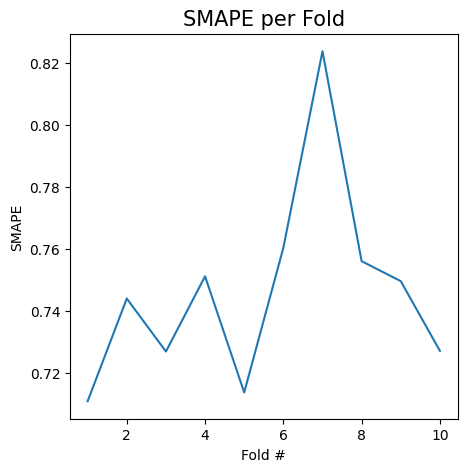

In [34]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import KFold
from sklearn.metrics import mean_absolute_error
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Prepare the Data
# Assuming you have already prepared the data as X_train_scaled, y_train, and n_folds

# Perform k-fold cross-validation
k = 10  # Number of folds
smape_scores = []

kf = KFold(n_splits=k, shuffle=True, random_state=42)

for fold, (train_index, val_index) in enumerate(kf.split(X_train_scaled)):
    # Prepare the data for the current fold
    X_train_fold = X_train_scaled[train_index]
    y_train_fold = y_train[train_index]
    X_val_fold = X_train_scaled[val_index]
    y_val_fold = y_train[val_index]

    # Initialize the model
    model = Lasso()

    # Train the model
    model.fit(X_train_fold, y_train_fold)

    # Evaluate the model on the validation set
    y_pred_val = model.predict(X_val_fold)
    smape = mean_absolute_error(y_val_fold, y_pred_val)
    smape_scores.append(smape)
    print(f"Fold {fold+1}: SMAPE = {smape:.4f}")

# Calculate overall SMAPE
overall_smape = np.mean(smape_scores)
print(f"Overall SMAPE: {overall_smape:.4f}")

# Plot SMAPE per Fold
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(5, 5))
data = pd.DataFrame({"Fold": [x + 1 for x in range(k)], "SMAPE": smape_scores})
_ = sns.lineplot(x="Fold", y="SMAPE", data=data, ax=ax)
_ = ax.set_title("SMAPE per Fold", fontsize=15)
_ = ax.set_ylabel("SMAPE")
_ = ax.set_xlabel("Fold #")
plt.show()


KNR

Fold 1: SMAPE = 1.2017
Fold 2: SMAPE = 1.2165
Fold 3: SMAPE = 1.3092
Fold 4: SMAPE = 1.3545
Fold 5: SMAPE = 1.1778
Fold 6: SMAPE = 1.2479
Fold 7: SMAPE = 1.3270
Fold 8: SMAPE = 1.2527
Fold 9: SMAPE = 1.2851
Fold 10: SMAPE = 1.0814
Overall SMAPE: 1.2454


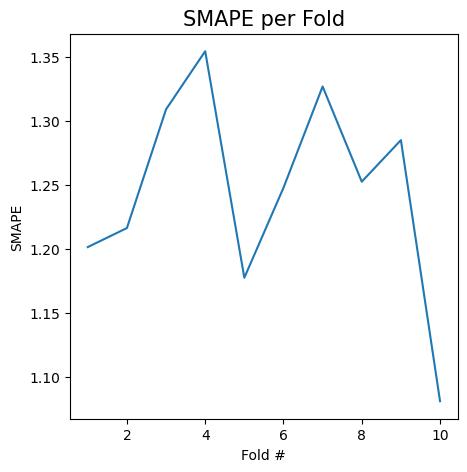

In [35]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import KFold
from sklearn.metrics import mean_absolute_error
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Prepare the Data
# Assuming you have already prepared the data as X_train_scaled, y_train, and n_folds

# Perform k-fold cross-validation
k = 10  # Number of folds
smape_scores = []

kf = KFold(n_splits=k, shuffle=True, random_state=42)

for fold, (train_index, val_index) in enumerate(kf.split(X_train_scaled)):
    # Prepare the data for the current fold
    X_train_fold = X_train_scaled[train_index]
    y_train_fold = y_train[train_index]
    X_val_fold = X_train_scaled[val_index]
    y_val_fold = y_train[val_index]

    # Initialize the model
    model = KNeighborsRegressor()

    # Train the model
    model.fit(X_train_fold, y_train_fold)

    # Evaluate the model on the validation set
    y_pred_val = model.predict(X_val_fold)
    smape = mean_absolute_error(y_val_fold, y_pred_val)
    smape_scores.append(smape)
    print(f"Fold {fold+1}: SMAPE = {smape:.4f}")

# Calculate overall SMAPE
overall_smape = np.mean(smape_scores)
print(f"Overall SMAPE: {overall_smape:.4f}")

# Plot SMAPE per Fold
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(5, 5))
data = pd.DataFrame({"Fold": [x + 1 for x in range(k)], "SMAPE": smape_scores})
_ = sns.lineplot(x="Fold", y="SMAPE", data=data, ax=ax)
_ = ax.set_title("SMAPE per Fold", fontsize=15)
_ = ax.set_ylabel("SMAPE")
_ = ax.set_xlabel("Fold #")
plt.show()


Random Forest Regressor

Fold 1: SMAPE = 0.3290
Fold 2: SMAPE = 0.3700
Fold 3: SMAPE = 0.3686
Fold 4: SMAPE = 0.3435
Fold 5: SMAPE = 0.3558
Fold 6: SMAPE = 0.4061
Fold 7: SMAPE = 0.4039
Fold 8: SMAPE = 0.3948
Fold 9: SMAPE = 0.3582
Fold 10: SMAPE = 0.3671
Overall SMAPE: 0.3697


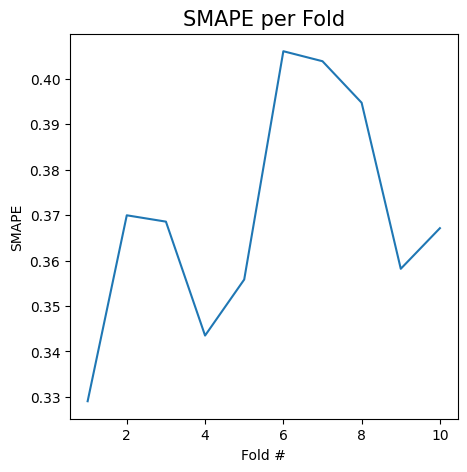

In [36]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import KFold
from sklearn.metrics import mean_absolute_error
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Prepare the Data
# Assuming you have already prepared the data as X_train_scaled, y_train, and n_folds

# Perform k-fold cross-validation
k = 10  # Number of folds
smape_scores = []

kf = KFold(n_splits=k, shuffle=True, random_state=42)

for fold, (train_index, val_index) in enumerate(kf.split(X_train_scaled)):
    # Prepare the data for the current fold
    X_train_fold = X_train_scaled[train_index]
    y_train_fold = y_train[train_index]
    X_val_fold = X_train_scaled[val_index]
    y_val_fold = y_train[val_index]

    # Initialize the model
    model = RandomForestRegressor()

    # Train the model
    model.fit(X_train_fold, y_train_fold)

    # Evaluate the model on the validation set
    y_pred_val = model.predict(X_val_fold)
    smape = mean_absolute_error(y_val_fold, y_pred_val)
    smape_scores.append(smape)
    print(f"Fold {fold+1}: SMAPE = {smape:.4f}")

# Calculate overall SMAPE
overall_smape = np.mean(smape_scores)
print(f"Overall SMAPE: {overall_smape:.4f}")

# Plot SMAPE per Fold
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(5, 5))
data = pd.DataFrame({"Fold": [x + 1 for x in range(k)], "SMAPE": smape_scores})
_ = sns.lineplot(x="Fold", y="SMAPE", data=data, ax=ax)
_ = ax.set_title("SMAPE per Fold", fontsize=15)
_ = ax.set_ylabel("SMAPE")
_ = ax.set_xlabel("Fold #")
plt.show()


**Adding Further for ESCI Journal**


# **Adaboost**

Fold 1: SMAPE = 0.3407
Fold 2: SMAPE = 0.3345
Fold 3: SMAPE = 0.3589
Fold 4: SMAPE = 0.4022
Fold 5: SMAPE = 0.4371
Fold 6: SMAPE = 0.3662
Fold 7: SMAPE = 0.4789
Fold 8: SMAPE = 0.4673
Fold 9: SMAPE = 0.3241
Fold 10: SMAPE = 0.2974
Overall SMAPE: 0.3807


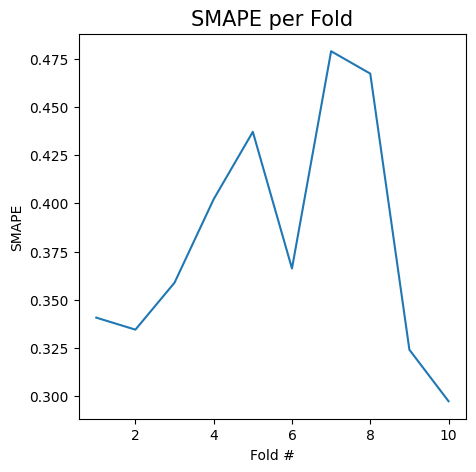

In [42]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.model_selection import KFold
from sklearn.metrics import mean_absolute_error
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Perform k-fold cross-validation
k = 10  # Number of folds
smape_scores = []

kf = KFold(n_splits=k, shuffle=True, random_state=42)

# Assuming y_train is a numpy array with multiple target variables
y_train_single = y_train[:, 0]  # Selecting the first target variable

for fold, (train_index, val_index) in enumerate(kf.split(X_train_scaled)):
    # Prepare the data for the current fold
    X_train_fold = X_train_scaled[train_index]
    y_train_fold = y_train_single[train_index]
    X_val_fold = X_train_scaled[val_index]
    y_val_fold = y_train_single[val_index]

    # Initialize the model
    model = AdaBoostRegressor()

    # Train the model
    model.fit(X_train_fold, y_train_fold)

    # Evaluate the model on the validation set
    y_pred_val = model.predict(X_val_fold)
    smape = mean_absolute_error(y_val_fold, y_pred_val)
    smape_scores.append(smape)
    print(f"Fold {fold+1}: SMAPE = {smape:.4f}")

# Calculate overall SMAPE
overall_smape = np.mean(smape_scores)
print(f"Overall SMAPE: {overall_smape:.4f}")

# Plot SMAPE per Fold
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(5, 5))
data = pd.DataFrame({"Fold": [x + 1 for x in range(k)], "SMAPE": smape_scores})
_ = sns.lineplot(x="Fold", y="SMAPE", data=data, ax=ax)
_ = ax.set_title("SMAPE per Fold", fontsize=15)
_ = ax.set_ylabel("SMAPE")
_ = ax.set_xlabel("Fold #")
plt.show()


# **XG Boost**

Fold 1: SMAPE = 0.0021
Fold 2: SMAPE = 0.0045
Fold 3: SMAPE = 0.0015
Fold 4: SMAPE = 0.0078
Fold 5: SMAPE = 0.0035
Fold 6: SMAPE = 0.0137
Fold 7: SMAPE = 0.0077
Fold 8: SMAPE = 0.0059
Fold 9: SMAPE = 0.0017
Fold 10: SMAPE = 0.0010
Overall SMAPE: 0.0049


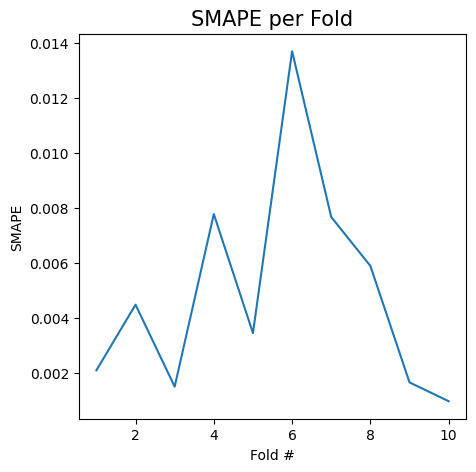

In [43]:
from xgboost import XGBRegressor
from sklearn.model_selection import KFold
from sklearn.metrics import mean_absolute_error
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Perform k-fold cross-validation
k = 10  # Number of folds
smape_scores = []

kf = KFold(n_splits=k, shuffle=True, random_state=42)

for fold, (train_index, val_index) in enumerate(kf.split(X_train_scaled)):
    # Prepare the data for the current fold
    X_train_fold = X_train_scaled[train_index]
    y_train_fold = y_train[train_index]
    X_val_fold = X_train_scaled[val_index]
    y_val_fold = y_train[val_index]

    # Initialize the model
    model = XGBRegressor()

    # Train the model
    model.fit(X_train_fold, y_train_fold)

    # Evaluate the model on the validation set
    y_pred_val = model.predict(X_val_fold)
    smape = mean_absolute_error(y_val_fold, y_pred_val)
    smape_scores.append(smape)
    print(f"Fold {fold+1}: SMAPE = {smape:.4f}")

# Calculate overall SMAPE
overall_smape = np.mean(smape_scores)
print(f"Overall SMAPE: {overall_smape:.4f}")

# Plot SMAPE per Fold
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(5, 5))
data = pd.DataFrame({"Fold": [x + 1 for x in range(k)], "SMAPE": smape_scores})
_ = sns.lineplot(x="Fold", y="SMAPE", data=data, ax=ax)
_ = ax.set_title("SMAPE per Fold", fontsize=15)
_ = ax.set_ylabel("SMAPE")
_ = ax.set_xlabel("Fold #")
plt.show()


In [47]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_val_fold, y_pred_val)
print(mse)
rmse = np.sqrt(mean_squared_error(y_val_fold, y_pred_val))
print(rmse)
from sklearn.metrics import r2_score
r2 = r2_score(y_val_fold, y_pred_val)
print(r2)

0.00024918109338138375
0.015785470958491664
0.9999929128329207


double check


Fold 1: SMAPE = 0.0021, MSE = 0.0011, R2 = 0.9999
Fold 2: SMAPE = 0.0045, MSE = 0.0054, R2 = 0.9999
Fold 3: SMAPE = 0.0015, MSE = 0.0004, R2 = 1.0000
Fold 4: SMAPE = 0.0078, MSE = 0.0389, R2 = 0.9998
Fold 5: SMAPE = 0.0035, MSE = 0.0025, R2 = 0.9998
Fold 6: SMAPE = 0.0137, MSE = 0.0668, R2 = 0.9989
Fold 7: SMAPE = 0.0077, MSE = 0.0114, R2 = 0.9988
Fold 8: SMAPE = 0.0059, MSE = 0.0282, R2 = 0.9997
Fold 9: SMAPE = 0.0017, MSE = 0.0016, R2 = 1.0000
Fold 10: SMAPE = 0.0010, MSE = 0.0002, R2 = 1.0000
Overall SMAPE: 0.0049
Overall MSE: 0.0157
Overall R2: 0.9997


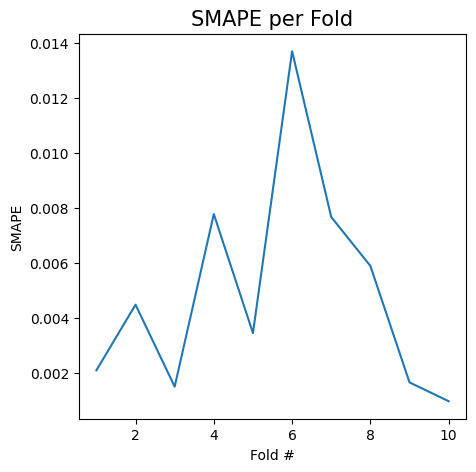

In [48]:
from xgboost import XGBRegressor
from sklearn.model_selection import KFold
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Perform k-fold cross-validation
k = 10  # Number of folds
smape_scores = []
mse_scores = []
r2_scores = []

kf = KFold(n_splits=k, shuffle=True, random_state=42)

for fold, (train_index, val_index) in enumerate(kf.split(X_train_scaled)):
    # Prepare the data for the current fold
    X_train_fold = X_train_scaled[train_index]
    y_train_fold = y_train[train_index]
    X_val_fold = X_train_scaled[val_index]
    y_val_fold = y_train[val_index]

    # Initialize the model
    model = XGBRegressor()

    # Train the model
    model.fit(X_train_fold, y_train_fold)

    # Evaluate the model on the validation set
    y_pred_val = model.predict(X_val_fold)

    # Calculate evaluation metrics
    smape = mean_absolute_error(y_val_fold, y_pred_val)
    mse = mean_squared_error(y_val_fold, y_pred_val)
    r2 = r2_score(y_val_fold, y_pred_val)

    # Append scores to respective lists
    smape_scores.append(smape)
    mse_scores.append(mse)
    r2_scores.append(r2)

    print(f"Fold {fold+1}: SMAPE = {smape:.4f}, MSE = {mse:.4f}, R2 = {r2:.4f}")

# Calculate overall SMAPE
overall_smape = np.mean(smape_scores)
overall_mse = np.mean(mse_scores)
overall_r2 = np.mean(r2_scores)

print(f"Overall SMAPE: {overall_smape:.4f}")
print(f"Overall MSE: {overall_mse:.4f}")
print(f"Overall R2: {overall_r2:.4f}")

# Plot SMAPE per Fold
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(5, 5))
data = pd.DataFrame({"Fold": [x + 1 for x in range(k)], "SMAPE": smape_scores})
_ = sns.lineplot(x="Fold", y="SMAPE", data=data, ax=ax)
_ = ax.set_title("SMAPE per Fold", fontsize=15)
_ = ax.set_ylabel("SMAPE")
_ = ax.set_xlabel("Fold #")
plt.show()


Fold 1: SMAPE = 0.4616, MSE = 0.3049, R2 = 0.9861
Fold 2: SMAPE = 0.3413, MSE = 0.2133, R2 = 0.9921
Fold 3: SMAPE = 0.3396, MSE = 0.2150, R2 = 0.9920
Fold 4: SMAPE = 0.3521, MSE = 0.2124, R2 = 0.9912
Fold 5: SMAPE = 0.4367, MSE = 0.3028, R2 = 0.9879
Fold 6: SMAPE = 0.2704, MSE = 0.1406, R2 = 0.9946
Fold 7: SMAPE = 0.4194, MSE = 0.2792, R2 = 0.9903
Fold 8: SMAPE = 0.3060, MSE = 0.1704, R2 = 0.9929
Fold 9: SMAPE = 0.3227, MSE = 0.1643, R2 = 0.9932
Fold 10: SMAPE = 0.4138, MSE = 0.2845, R2 = 0.9866
Overall SMAPE: 0.3664
Overall MSE: 0.2288
Overall R2: 0.9907


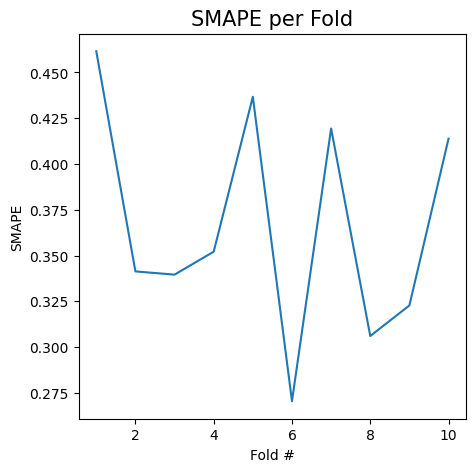

In [50]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.model_selection import KFold
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Perform k-fold cross-validation
k = 10  # Number of folds
smape_scores = []
mse_scores = []
r2_scores = []

kf = KFold(n_splits=k, shuffle=True, random_state=42)

y_train_single = y_train[:, 0]  # Selecting the first target variable

for fold, (train_index, val_index) in enumerate(kf.split(X_train_scaled)):
    # Prepare the data for the current fold
    X_train_fold = X_train_scaled[train_index]
    y_train_fold = y_train_single[train_index]
    X_val_fold = X_train_scaled[val_index]
    y_val_fold = y_train_single[val_index]

    # Initialize the model
    model = AdaBoostRegressor()

    # Train the model
    model.fit(X_train_fold, y_train_fold)

    # Evaluate the model on the validation set
    y_pred_val = model.predict(X_val_fold)

    # Calculate evaluation metrics
    smape = mean_absolute_error(y_val_fold, y_pred_val)
    mse = mean_squared_error(y_val_fold, y_pred_val)
    r2 = r2_score(y_val_fold, y_pred_val)

    # Append scores to respective lists
    smape_scores.append(smape)
    mse_scores.append(mse)
    r2_scores.append(r2)

    print(f"Fold {fold+1}: SMAPE = {smape:.4f}, MSE = {mse:.4f}, R2 = {r2:.4f}")

# Calculate overall metrics
overall_smape = np.mean(smape_scores)
overall_mse = np.mean(mse_scores)
overall_r2 = np.mean(r2_scores)

print(f"Overall SMAPE: {overall_smape:.4f}")
print(f"Overall MSE: {overall_mse:.4f}")
print(f"Overall R2: {overall_r2:.4f}")

# Plot SMAPE per Fold
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(5, 5))
data = pd.DataFrame({"Fold": [x + 1 for x in range(k)], "SMAPE": smape_scores})
_ = sns.lineplot(x="Fold", y="SMAPE", data=data, ax=ax)
_ = ax.set_title("SMAPE per Fold", fontsize=15)
_ = ax.set_ylabel("SMAPE")
_ = ax.set_xlabel("Fold #")
plt.show()


Fold 1: SMAPE = 0.3283, MSE = 0.4872, R2 = 0.9480
Fold 2: SMAPE = 0.3796, MSE = 0.7355, R2 = 0.9185
Fold 3: SMAPE = 0.3698, MSE = 0.6163, R2 = 0.9384
Fold 4: SMAPE = 0.3442, MSE = 0.6038, R2 = 0.9337
Fold 5: SMAPE = 0.3480, MSE = 0.5742, R2 = 0.9243
Fold 6: SMAPE = 0.4218, MSE = 1.0567, R2 = 0.9172
Fold 7: SMAPE = 0.4064, MSE = 0.8177, R2 = 0.9298
Fold 8: SMAPE = 0.3855, MSE = 0.9489, R2 = 0.9321
Fold 9: SMAPE = 0.3549, MSE = 0.5314, R2 = 0.9341
Fold 10: SMAPE = 0.3698, MSE = 0.5876, R2 = 0.9343
Overall SMAPE: 0.3708
Overall MSE: 0.6959
Overall R2: 0.9310


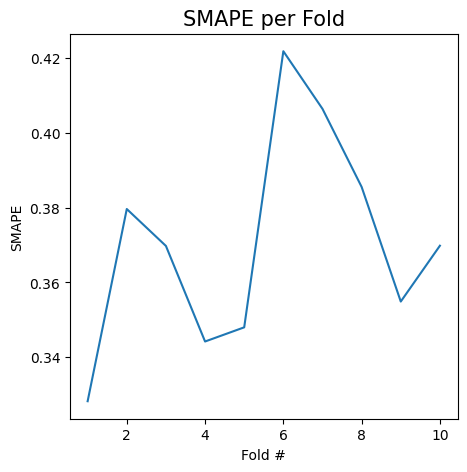

In [51]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import KFold
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Perform k-fold cross-validation
k = 10  # Number of folds
smape_scores = []
mse_scores = []
r2_scores = []

kf = KFold(n_splits=k, shuffle=True, random_state=42)

for fold, (train_index, val_index) in enumerate(kf.split(X_train_scaled)):
    # Prepare the data for the current fold
    X_train_fold = X_train_scaled[train_index]
    y_train_fold = y_train[train_index]
    X_val_fold = X_train_scaled[val_index]
    y_val_fold = y_train[val_index]

    # Initialize the model
    model = RandomForestRegressor()

    # Train the model
    model.fit(X_train_fold, y_train_fold)

    # Evaluate the model on the validation set
    y_pred_val = model.predict(X_val_fold)

    # Calculate evaluation metrics
    smape = mean_absolute_error(y_val_fold, y_pred_val)
    mse = mean_squared_error(y_val_fold, y_pred_val)
    r2 = r2_score(y_val_fold, y_pred_val)

    # Append scores to respective lists
    smape_scores.append(smape)
    mse_scores.append(mse)
    r2_scores.append(r2)

    print(f"Fold {fold+1}: SMAPE = {smape:.4f}, MSE = {mse:.4f}, R2 = {r2:.4f}")

# Calculate overall metrics
overall_smape = np.mean(smape_scores)
overall_mse = np.mean(mse_scores)
overall_r2 = np.mean(r2_scores)

print(f"Overall SMAPE: {overall_smape:.4f}")
print(f"Overall MSE: {overall_mse:.4f}")
print(f"Overall R2: {overall_r2:.4f}")

# Plot SMAPE per Fold
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(5, 5))
data = pd.DataFrame({"Fold": [x + 1 for x in range(k)], "SMAPE": smape_scores})
_ = sns.lineplot(x="Fold", y="SMAPE", data=data, ax=ax)
_ = ax.set_title("SMAPE per Fold", fontsize=15)
_ = ax.set_ylabel("SMAPE")
_ = ax.set_xlabel("Fold #")
plt.show()


Fold 1: SMAPE = 1.2017, MSE = 8.2054, R2 = 0.8385
Fold 2: SMAPE = 1.2165, MSE = 6.8889, R2 = 0.8754
Fold 3: SMAPE = 1.3092, MSE = 8.3766, R2 = 0.8554
Fold 4: SMAPE = 1.3545, MSE = 10.7672, R2 = 0.8448
Fold 5: SMAPE = 1.1778, MSE = 7.4551, R2 = 0.8789
Fold 6: SMAPE = 1.2479, MSE = 8.7479, R2 = 0.8712
Fold 7: SMAPE = 1.3270, MSE = 10.4195, R2 = 0.8622
Fold 8: SMAPE = 1.2527, MSE = 8.7301, R2 = 0.8840
Fold 9: SMAPE = 1.2851, MSE = 8.3678, R2 = 0.8644
Fold 10: SMAPE = 1.0814, MSE = 5.5258, R2 = 0.8914
Overall SMAPE: 1.2454
Overall MSE: 8.3484
Overall R2: 0.8666


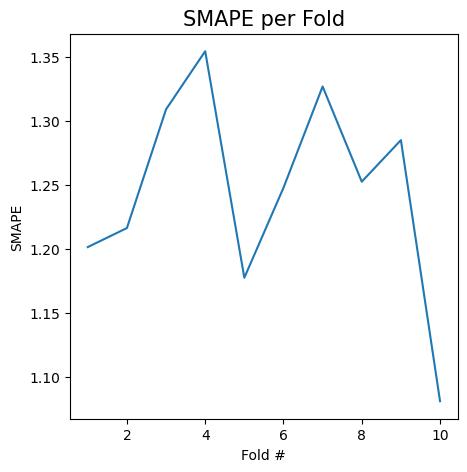

In [52]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import KFold
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Perform k-fold cross-validation
k = 10  # Number of folds
smape_scores = []
mse_scores = []
r2_scores = []

kf = KFold(n_splits=k, shuffle=True, random_state=42)

for fold, (train_index, val_index) in enumerate(kf.split(X_train_scaled)):
    # Prepare the data for the current fold
    X_train_fold = X_train_scaled[train_index]
    y_train_fold = y_train[train_index]
    X_val_fold = X_train_scaled[val_index]
    y_val_fold = y_train[val_index]

    # Initialize the model
    model = KNeighborsRegressor()

    # Train the model
    model.fit(X_train_fold, y_train_fold)

    # Evaluate the model on the validation set
    y_pred_val = model.predict(X_val_fold)

    # Calculate evaluation metrics
    smape = mean_absolute_error(y_val_fold, y_pred_val)
    mse = mean_squared_error(y_val_fold, y_pred_val)
    r2 = r2_score(y_val_fold, y_pred_val)

    # Append scores to respective lists
    smape_scores.append(smape)
    mse_scores.append(mse)
    r2_scores.append(r2)

    print(f"Fold {fold+1}: SMAPE = {smape:.4f}, MSE = {mse:.4f}, R2 = {r2:.4f}")

# Calculate overall metrics
overall_smape = np.mean(smape_scores)
overall_mse = np.mean(mse_scores)
overall_r2 = np.mean(r2_scores)

print(f"Overall SMAPE: {overall_smape:.4f}")
print(f"Overall MSE: {overall_mse:.4f}")
print(f"Overall R2: {overall_r2:.4f}")

# Plot SMAPE per Fold
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(5, 5))
data = pd.DataFrame({"Fold": [x + 1 for x in range(k)], "SMAPE": smape_scores})
_ = sns.lineplot(x="Fold", y="SMAPE", data=data, ax=ax)
_ = ax.set_title("SMAPE per Fold", fontsize=15)
_ = ax.set_ylabel("SMAPE")
_ = ax.set_xlabel("Fold #")
plt.show()


Fold 1: SMAPE = 0.9294, MSE = 47.8310, R2 = 0.2557
Fold 2: SMAPE = 0.9581, MSE = 40.8745, R2 = 0.3083
Fold 3: SMAPE = 0.9202, MSE = 43.0230, R2 = 0.2959
Fold 4: SMAPE = 0.9331, MSE = 33.9584, R2 = 0.4132
Fold 5: SMAPE = 0.9267, MSE = 45.7800, R2 = 0.2810
Fold 6: SMAPE = 0.9169, MSE = 40.9670, R2 = 0.3434
Fold 7: SMAPE = 0.9308, MSE = 46.5216, R2 = 0.3529
Fold 8: SMAPE = 0.9502, MSE = 48.6338, R2 = 0.2599
Fold 9: SMAPE = 0.9540, MSE = 41.8120, R2 = 0.3168
Fold 10: SMAPE = 0.9486, MSE = 39.7854, R2 = 0.2837
Overall SMAPE: 0.9368
Overall MSE: 42.9187
Overall R2: 0.3111


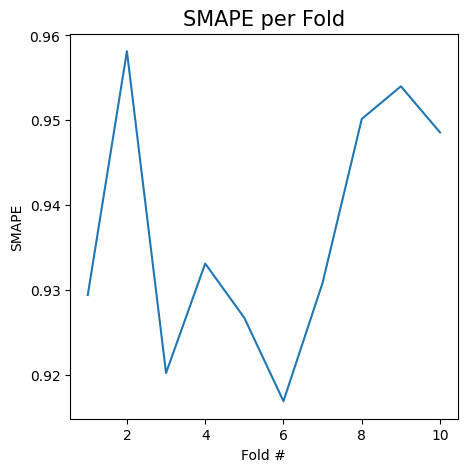

In [53]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import KFold
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Step 1: Prepare the Data
# Assuming you have already prepared the data as X_train_scaled, y_train, and n_folds

# Convert data to PyTorch tensors
X_train_tensor = torch.Tensor(X_train_scaled)
y_train_tensor = torch.Tensor(y_train)

# Define the Deep Learning Model
class RegressionModel(nn.Module):
    def __init__(self, input_size):
        super(RegressionModel, self).__init__()
        self.fc1 = nn.Linear(input_size, 64)
        self.fc2 = nn.Linear(64, 64)
        self.fc3 = nn.Linear(64, 4)  # Output layer with 4 units for the 4 target variables

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x

# Function to calculate SMAPE
def calculate_smape(targets, predictions):
    numerator = torch.abs(targets - predictions)
    denominator = torch.abs(targets) + torch.abs(predictions)
    smape = 2 * torch.mean(numerator / denominator)
    return smape.item()

# Perform k-fold cross-validation
k = 10  # Number of folds
smape_scores = []
mse_scores = []
r2_scores = []

kf = KFold(n_splits=k, shuffle=True, random_state=42)

for fold, (train_index, val_index) in enumerate(kf.split(X_train_tensor)):
    # Prepare the data for the current fold
    X_train_fold = X_train_tensor[train_index]
    y_train_fold = y_train_tensor[train_index]
    X_val_fold = X_train_tensor[val_index]
    y_val_fold = y_train_tensor[val_index]

    # Initialize the model
    model = RegressionModel(X_train_scaled.shape[1])

    # Define the loss function and optimizer
    criterion = nn.L1Loss()
    optimizer = optim.Adam(model.parameters(), lr=0.001)

    # Train the model
    num_epochs = 100

    for epoch in range(num_epochs):
        optimizer.zero_grad()
        outputs = model(X_train_fold)
        loss = criterion(outputs, y_train_fold)
        loss.backward()
        optimizer.step()

    # Evaluate the model on the validation set
    with torch.no_grad():
        y_pred_val = model(X_val_fold)
        smape = calculate_smape(y_val_fold, y_pred_val)
        mse = mean_squared_error(y_val_fold, y_pred_val)
        r2 = r2_score(y_val_fold, y_pred_val)
        smape_scores.append(smape)
        mse_scores.append(mse)
        r2_scores.append(r2)
        print(f"Fold {fold+1}: SMAPE = {smape:.4f}, MSE = {mse:.4f}, R2 = {r2:.4f}")

# Calculate overall metrics
overall_smape = np.mean(smape_scores)
overall_mse = np.mean(mse_scores)
overall_r2 = np.mean(r2_scores)

print(f"Overall SMAPE: {overall_smape:.4f}")
print(f"Overall MSE: {overall_mse:.4f}")
print(f"Overall R2: {overall_r2:.4f}")

# Plot SMAPE per Fold
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(5, 5))
data = pd.DataFrame({"Fold": [x + 1 for x in range(k)], "SMAPE": smape_scores})
_ = sns.lineplot(x="Fold", y="SMAPE", data=data, ax=ax)
_ = ax.set_title("SMAPE per Fold", fontsize=15)
_ = ax.set_ylabel("SMAPE")
_ = ax.set_xlabel("Fold #")
plt.show()



In [54]:
import tensorflow as tf
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import numpy as np

# Step 1: Prepare the Data
data = train_copy[features + ["upd23b_clinical_state_on_medication", "visit_month"]]
targets = train_copy[["updrs_1", "updrs_2", "updrs_3", "updrs_4"]]

# Step 2: Convert non-numeric column to numeric representation
le = LabelEncoder()
data["upd23b_clinical_state_on_medication"] = le.fit_transform(data["upd23b_clinical_state_on_medication"])

# Step 3: Impute Missing Values in Features
numeric_features = features + ["visit_month"]
non_numeric_features = ["upd23b_clinical_state_on_medication"]
numeric_imputer = SimpleImputer(strategy='median')
non_numeric_imputer = SimpleImputer(strategy='most_frequent')

data[numeric_features] = numeric_imputer.fit_transform(data[numeric_features])
data[non_numeric_features] = non_numeric_imputer.fit_transform(data[non_numeric_features])

# Step 4: Impute Missing Values in Targets
target_imputer = SimpleImputer(strategy='median')
targets_imputed = target_imputer.fit_transform(targets)

# Step 5: Split the Data
X_train, X_test, y_train, y_test = train_test_split(data, targets_imputed, test_size=0.2, random_state=42)

# Step 6: Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 7: TensorFlow Model Training
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(4)
])

model.compile(optimizer='adam', loss='mean_absolute_error')

model.fit(X_train_scaled, y_train, epochs=10, batch_size=32)

# Step 8: Model Prediction
y_pred = model.predict(X_test_scaled)

# Step 9: Calculate Metrics (SMAPE, MSE, R2)
smape_scores = []
mse_scores = []
r2_scores = []

for i, col in enumerate(targets.columns):
    true_values = y_test[:, i]
    predicted_values = y_pred[:, i]

    # Calculate SMAPE
    smape = 2 * np.mean(np.abs(true_values - predicted_values) / (np.abs(true_values) + np.abs(predicted_values)))
    smape_scores.append(smape)

    # Calculate MSE
    mse = mean_squared_error(true_values, predicted_values)
    mse_scores.append(mse)

    # Calculate R2
    r2 = r2_score(true_values, predicted_values)
    r2_scores.append(r2)

# Calculate overall metrics
overall_smape = np.mean(smape_scores)
overall_mse = np.mean(mse_scores)
overall_r2 = np.mean(r2_scores)

print(f"Overall SMAPE: {overall_smape:.4f}")
print(f"Overall MSE: {overall_mse:.4f}")
print(f"Overall R2: {overall_r2:.4f}")


Epoch 1/10
121/121 [==============================] - 2s 7ms/step - loss: 6.9516
Epoch 2/10
121/121 [==============================] - 1s 11ms/step - loss: 3.0908
Epoch 3/10
121/121 [==============================] - 0s 3ms/step - loss: 1.5478
Epoch 4/10
121/121 [==============================] - 0s 3ms/step - loss: 0.9296
Epoch 5/10
121/121 [==============================] - 0s 3ms/step - loss: 0.7065
Epoch 6/10
121/121 [==============================] - 0s 3ms/step - loss: 0.6006
Epoch 7/10
121/121 [==============================] - 0s 3ms/step - loss: 0.5332
Epoch 8/10
121/121 [==============================] - 0s 3ms/step - loss: 0.4716
Epoch 9/10
121/121 [==============================] - 0s 3ms/step - loss: 0.4303
Epoch 10/10
31/31 [==============================] - 0s 2ms/step
Overall SMAPE: 0.6034
Overall MSE: 5.8893
Overall R2: 0.9017
